In [1]:
''' 

December, 2024, Winter
Dynamic_averaing Results script

Last update: April 28, 25


'''
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd
import pylab
from scipy import stats
from scipy.optimize import curve_fit
#from scipy import asarray as ar,exp
#import cv2
from scipy import ndimage
from PIL import Image
import imageio
# loading libraries or packages
import os
import pingouin as pg

print('Get current working directory : ', os.getcwd())
path = '/Users/gorkemer/Desktop/dynamic_averaging/'



e1data = pd.read_csv(path + 'e1/e1_total_behavioral_data.csv')
e2data = pd.read_csv(path + 'e2/e2_total_behavioral_data.csv')
e3data = pd.read_csv(path + 'e3/e3_total_behavioral_data.csv')

e1data['subID_first_part'] = e1data['txtFileName'].str.split('_').str[0]
e2data['subID_first_part'] = e2data['fileName'].str.split('_').str[1]
e3data['subID_first_part'] = e3data['fileName'].str.split('_').str[1]

print("E1 = this many subID_new participants", len(e1data['subID_new'].unique())) 
# print("E1 = this many subID participants", len(e1data['subID'].unique())) # subID stores both High freq and low freq. 
print("E1 = this many subID_first_part participants", len(e1data['subID_first_part'].unique()))

print("E2 = this many subID participants", len(e2data['subID'].unique()))
print("E2 = this many subID_first_part participants", len(e2data['subID_first_part'].unique()))

print("E3 = this many subID participants", len(e3data['subID'].unique()))
print("E3 = this many subID_first_part participants", len(e3data['subID_first_part'].unique()))
postExp_df = pd.read_csv(path + "e3/postExpQuestion.csv")

''' functions '''

def categorizeDistractorEmotion(value):
    if (value == "HHHH") | (value == "AAAA"):
        return 'congruent' #congruent
    if (value == "HAAA") | (value == "AHHH"):
        return 'incongruent'
    if value.startswith('s'):
        return 'singleTrial'
    else:
        return 'others' # all others are others
def categorizeTargetEmotion(value):
    if value.startswith(('H')):
        return 'HappyTarget'
    if value.startswith(('A')):
        return 'AngryTarget'
    if value.startswith('s'):
        if value.endswith('A'):
            return 'AngryTarget'
        if value.endswith('H'):
            return 'HappyTarget'
        
def categorizeSingleTrial(value):
    if value.startswith(('g')):
        return 'group'
    if value.startswith(('s')):
        return 'single'



Get current working directory :  /Users/gorkemer/Documents/emotion_manuscript_ensemble_apertures
E1 = this many subID_new participants 87
E1 = this many subID_first_part participants 87
E2 = this many subID participants 81
E2 = this many subID_first_part participants 81
E3 = this many subID participants 72
E3 = this many subID_first_part participants 72


In [ ]:

# # but first, I need to remove na values
# nan_rows = e3data[e3data['stimOrg'].isna()]
# # checked for E3 rubbish data so removing it:
# e3data_clean = e3data.dropna(subset=['stimOrg']) 
# e3data = e3data_clean
# e3data['distractorEmotion'] = e3data['stimOrg'].apply(categorizeDistractorEmotion)
# e3data['targetEmotion'] = e3data['stimOrg'].apply(categorizeTargetEmotion)
# e3data['singleTrial'] = e3data['singleGroup'].apply(categorizeSingleTrial)

# mask1 = ((e3data.targetStrength == 6) & (e3data.up_log == True))
# mask2 = ((e3data.targetStrength == 31) & (e3data.up_log == True))
# mask3 = ((e3data.targetStrength == 31) & (e3data.up_log == False))
# mask4 = ((e3data.targetStrength == 6) & (e3data.up_log == False))

# e3data.loc[mask1, 'aperture'] = 1
# e3data.loc[mask2, 'aperture'] = 2
# e3data.loc[mask3, 'aperture'] = 3
# e3data.loc[mask4, 'aperture'] = 4


# indvDataPointsSize = 100
# meanDataPointsSize = 150 

In [ ]:
# ''' now figuring out a systematic way of identifying individuals who are probably responding to the average group emotion '''

# # RUNNING RESULTS ###
# includeOthers = False
# selectedExpID = 3

# if selectedExpID == 1:
#     tmpdata = e1data 
# if selectedExpID == 2:
#     tmpdata = e2data 
# if selectedExpID == 3:
#     tmpdata = e3data
# print("this many subID_first_part participants", len(tmpdata['subID_first_part'].unique()))
# mapping = {str(i): i for i in range(-8, 9)}  # this mapping is basically to convert the string into numbers ('8' mapped to 8)
# tmpdata['responseKey'] = tmpdata['responseKey'].map(mapping).fillna(tmpdata['responseKey'])
# #tmpdata['responseKey'] = pd.to_numeric(tmpdata['responseKey'], errors='coerce') # this should work the same way above. 
# tmpdata_clean = tmpdata.dropna(subset=['stimOrg']) # to clean the rows with irregular data types; it should work the same way as the following, nan_rows = tmpdata[tmpdata['stimOrg'].isna()]
# tmpdata = tmpdata_clean
# ''' assingning new variables/columns'''
# tmpdata['distractorEmotion'] = tmpdata['stimOrg'].apply(categorizeDistractorEmotion)
# tmpdata['targetEmotion'] = tmpdata['stimOrg'].apply(categorizeTargetEmotion)
# tmpdata['mapped_response_AngryPositive'] = tmpdata.apply(lambda row: row['responseKey'] if row['targetEmotion'] == 'HappyTarget' else row['responseKey'] * -1, axis=1)
# tmpdata['targetEmotion'] = tmpdata['stimOrg'].apply(categorizeTargetEmotion)

# plt.figure(figsize=(4, 6))
# averages_tmpddf3 = tmpdata.groupby(['subID_first_part', 'targetEmotion', 'distractorEmotion']).agg(
#     mean=('responseKey', 'mean'), #mapped_response_AngryPositive
#     std = ('responseKey', 'std'),
#     sem=('responseKey', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
# ).reset_index()
# #sns.boxplot(data=averages_tmpddf, x='distractorEmotion', y='mean', color = "white")
# # # Define the list of `colID` values to highlight
# # highlight_list = slopSlidedPeople # e.g., ['B44', 'B42', 'B81']

# # # Add a new column for the combined color logic
# # def color_logic(row):
# #     if row['subID_first_part'] in highlight_list:
# #         return 'highlight'  # Use a specific color for highlighted rows
# #     return row['distractorEmotion']  # Fall back to distractorEmotion logic

# # averages_tmpddf3['color_group'] = averages_tmpddf3.apply(color_logic, axis=1)

# # # Define the combined palette
# # custom_palette_color_group = {
# #     'congruent': 'black',
# #     'incongruent': 'black',
# #     'singleTrial': 'blue',
# #     'others': 'gray',
# #     'highlight': 'brightblue'  # Add a distinct color for highlighted rows
# # }

# if not includeOthers:
#     averages_tmpddf3 = averages_tmpddf3[averages_tmpddf3.distractorEmotion != "others"]
# sem_mean_of_means = averages_tmpddf3.groupby([ 'distractorEmotion', 'targetEmotion']).agg(mean=('mean', 'mean'), sem=('mean', 'sem')).reset_index()
# sns.lineplot(data=averages_tmpddf3, x='targetEmotion', y='mean', style='targetEmotion', marker=None, dashes=False, alpha=0.15, legend=None, markersize = 8, color = (180/255, 180/255, 180/255))
# #sns.lineplot(data=averages_tmpddf2, x='distractorEmotion', y='mean', hue='distractorEmotion', style='distractorEmotion', markers=["o", "*"], dashes=False, alpha=0.5, legend=None, markersize=8,  palette={ 'congruent': 'black', 'incongruent': 'red'}) #  # Use hue to map colors based on distractorEmotion
# sns.lineplot(
#     data=averages_tmpddf3,
#     x='targetEmotion',
#     y='mean',
#     hue='distractorEmotion',  # Different colors for distractorEmotion levels
#     style='distractorEmotion',  # Different markers for distractorEmotion levels
#     markers=['o', 's', 'D'],  # Define marker styles
#     dashes=False,  # Solid lines
#     alpha=0.05,
#     markersize=6,
#     palette={'congruent': 'black', 'incongruent': 'black', 'singleTrial': 'blue', 'others': 'gray'},  # Custom palette for distractorEmotion ##F8766D
#     units='subID_first_part',  # Ensures lines connect within each subID_first_part
#     estimator=None  # Plot raw data without aggregation
# )
# sns.lineplot(data=sem_mean_of_means, x='targetEmotion', y='mean', style = "distractorEmotion", marker= None, dashes=False, alpha=0.75, color = "black", legend=None, linewidth = 4)
# sns.lineplot(data=sem_mean_of_means, x='targetEmotion', y='mean', style = "distractorEmotion", markers=['o', 's', 'D'], dashes=False, alpha=0.86, color = (255/255, 255/255, 255/255), legend=None, markersize = 12, markeredgecolor='black',  markeredgewidth=2)
# # for i in range(len(sem_mean_of_means)):
# #     color = scatter_plot.collections[0].get_facecolors()[i]
# #     plt.errorbar(x=sem_mean_of_means['distractorEmotion'][i], y=sem_mean_of_means['mean'][i], yerr=sem_mean_of_means['sem'][i], fmt='none', capsize=0,  color=color)#color)#scatter_plot.get_lines()[i].get_color())

# # Customize the plot
# plt.title(f'') #Response as a Function of distractorEmotion with Mean Values | targetEmotion together | e{selectedExpID} 
# plt.ylabel('') #Response
# plt.title('') #f'collapsed | e{selectedExpID} '
# plt.xlabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Target-Distractor Emotional Congruency
# plt.ylabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Reported Facial Expression Intensity
# plt.xticks(fontsize=16, fontweight='regular', fontname='Times New Roman')  #, rotation = 45
# plt.yticks(fontsize=16, fontweight='regular', fontname='Times New Roman')
# plt.ylim(-6.5, 6.5)
# plt.grid(axis='y', linestyle='-', color='gray', alpha=0.37, linewidth = 1)
# current_xlim = plt.gca().get_xlim()
# plt.xlim(current_xlim[0] - 0.5, current_xlim[1] + 0.5)  # Adjust these values as needed
# plt.tight_layout()
# plt.axhline(y=0, color='black', linestyle='dashed', linewidth = 1.7)
# ax = plt.gca()  # Get current axis
# ax.spines['top'].set_linewidth(2)
# ax.spines['right'].set_linewidth(2)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)
# ax.spines['top'].set_color('black')
# ax.spines['right'].set_color('black')
# ax.spines['left'].set_color('black')
# ax.spines['bottom'].set_color('black')

# only_angry = averages_tmpddf3[averages_tmpddf3.targetEmotion == "AngryTarget"]
# only_happy = averages_tmpddf3[averages_tmpddf3.targetEmotion == "HappyTarget"]

# print(only_angry.subID_first_part[(only_angry.distractorEmotion == "incongruent") & (only_angry['mean'] > 0)])
# print(only_happy.subID_first_part[(only_happy.distractorEmotion == "incongruent") & (only_happy['mean'] < 0)])

# # now printing their IDs

# print(only_angry[(only_angry.distractorEmotion == "incongruent") & (only_angry['mean'] > 0)])
# print(only_happy[(only_happy.distractorEmotion == "incongruent") & (only_happy['mean'] < 0)])


# ''' end of figuring out the excluded people list '''

In [ ]:
e1data.spatialFreqCond.unique()

In [ ]:
# RUNNING RESULTS ###
includeOthers = False
excluded_people = False
selectedExpID = 2
# runSpatialFreq = '\\BB' # '\\HPF' '\\LPF' '\\BB'

print(f"running study {selectedExpID}")
if selectedExpID == 1:
    tmpdata = e1data 
    # tmpdata = tmpdata[tmpdata.spatialFreqCond == runSpatialFreq]# testing only one type of spatial frequency at a time.  array(['\\HPF', '\\LPF'], dtype=object)
    slopSlidedPeople = ['B42', 'B44', 'B81']
if selectedExpID == 2:
    tmpdata = e2data 
    # tmpdata = tmpdata[tmpdata.spatialFreqCond == runSpatialFreq]# testing only one type of spatial frequency at a time.  array(['\\HPF', '\\LPF', '\\BB'], dtype=object)
    slopSlidedPeople = ['07', '21', '26', '35', '59', '70', '7777', '83'] # eight
if selectedExpID == 3:
    tmpdata = e3data
    slopSlidedPeople = ['17', '18', '24', '34', '43', '50', '51', '6464'] # eight

print("this many subID_first_part participants (before)", len(tmpdata['subID_first_part'].unique()))
print("these are them subID_first_part participants", tmpdata['subID_first_part'].unique())

mapping = {str(i): i for i in range(-8, 9)}  # this mapping is basically to convert the string into numbers ('8' mapped to 8)
tmpdata['responseKey'] = tmpdata['responseKey'].map(mapping).fillna(tmpdata['responseKey'])
#tmpdata['responseKey'] = pd.to_numeric(tmpdata['responseKey'], errors='coerce') # this should work the same way above. 
tmpdata_clean = tmpdata.dropna(subset=['stimOrg']) # to clean the rows with irregular data types; it should work the same way as the following, nan_rows = tmpdata[tmpdata['stimOrg'].isna()]
tmpdata = tmpdata_clean
''' assingning new variables/columns'''
tmpdata['distractorEmotion'] = tmpdata['stimOrg'].apply(categorizeDistractorEmotion)
tmpdata['targetEmotion'] = tmpdata['stimOrg'].apply(categorizeTargetEmotion)
tmpdata['mapped_response_AngryPositive'] = tmpdata.apply(lambda row: row['responseKey'] if row['targetEmotion'] == 'HappyTarget' else row['responseKey'] * -1, axis=1)
tmpdata['targetEmotion'] = tmpdata['stimOrg'].apply(categorizeTargetEmotion)
# Step: Z-score within each participant across all their raw responses

tmpdata['z_responseKey'] = tmpdata.groupby(['subID_first_part'])['responseKey'].transform(
    lambda x: (x - x.mean()) / x.std(ddof=1)
)
tmpdata['mapped_response_AngryPositive_z_transformed'] = tmpdata.apply(lambda row: row['z_responseKey'] if row['targetEmotion'] == 'HappyTarget' else row['responseKey'] * -1, axis=1)
tmpdata.head()

In [ ]:
if not includeOthers:
    tmpdata = tmpdata[tmpdata.distractorEmotion != "others"]

# tmpdata['mapped_response_AngryPositive'] = tmpdata.apply(lambda row: row['responseKey'] if row['targetEmotion'] == 'HappyTarget' else row['responseKey'] * -1, axis=1)

# tmpdata['z_responseKey'] = tmpdata.groupby(['subID_first_part', 'targetEmotion', 'spatialFreqCond'])['mapped_response_AngryPositive'].transform(
#     lambda x: (x - x.mean()) / x.std(ddof=1)
# )


averages_tmpddf = tmpdata.groupby(['subID_first_part', 'distractorEmotion', 'targetEmotion', 'spatialFreqCond']).agg(
    mean=('responseKey', 'mean'),
    std = ('responseKey', 'std'),
    sem=('responseKey', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()
print(averages_tmpddf.head())

wide_df = averages_tmpddf.pivot(
    index='subID_first_part',
    columns=['distractorEmotion', 'targetEmotion', 'spatialFreqCond'],
    values=['mean', 'std', 'sem']
)
# Flatten MultiIndex columns
wide_df.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in wide_df.columns]

wide_df.to_csv(f"ge_wide_format_exp{selectedExpID}.csv")

aov_happy = pg.rm_anova(dv='mean', within=['distractorEmotion', 'spatialFreqCond'], subject='subID_first_part', data=averages_tmpddf[averages_tmpddf.targetEmotion == "HappyTarget"], detailed=True)
aov_angry = pg.rm_anova(dv='mean', within=['distractorEmotion', 'spatialFreqCond'], subject='subID_first_part', data=averages_tmpddf[averages_tmpddf.targetEmotion == "AngryTarget"], detailed=True)
print("below is for happy target results | with spatial frequencies: ")
print(aov_happy)
print("below is for angry target results | with spatial frequencies: ")
print(aov_angry)

import seaborn as sns
import matplotlib.pyplot as plt

# Set a nice style
sns.set(style="whitegrid")

# Plot for HappyTarget
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    data=averages_tmpddf[averages_tmpddf['targetEmotion'] == "HappyTarget"],
    x='spatialFreqCond', 
    y='mean', 
    hue='distractorEmotion', 
    ci=95, # we will add our own error bars
    ax=ax
)

# # Add error bars manually (SEM)
# happy_data = averages_tmpddf[averages_tmpddf['targetEmotion'] == "HappyTarget"]
# for i, bar in enumerate(ax.patches):
#     # Get the matching row
#     row = happy_data.iloc[i]
#     x = bar.get_x() + bar.get_width() / 2
#     y = bar.get_height()
#     sem = row['sem']
#     ax.errorbar(x, y, yerr=sem, color='black', capsize=5, fmt='none')

ax.set_title('Happy Target Responses')
ax.set_ylabel('Mean Z-scored Response')
ax.set_xlabel('Spatial Frequency Condition')
plt.legend(title='Distractor Emotion')
plt.tight_layout()
plt.show()

# (Repeat similarly for AngryTarget if you want)
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    data=averages_tmpddf[averages_tmpddf['targetEmotion'] == "AngryTarget"],
    x='spatialFreqCond', 
    y='mean', 
    hue='distractorEmotion', 
    ci=95, # we will add our own error bars
    ax=ax
)
ax.set_title('Angry Target Responses')
ax.set_ylabel('Mean Response')
ax.set_xlabel('Spatial Frequency Condition')
plt.legend(title='Distractor Emotion')
plt.tight_layout()
plt.show()


In [ ]:
if not includeOthers:
    tmpdata = tmpdata[tmpdata.distractorEmotion != "others"]

# tmpdata['mapped_response_AngryPositive'] = tmpdata.apply(lambda row: row['responseKey'] if row['targetEmotion'] == 'HappyTarget' else row['responseKey'] * -1, axis=1)

# tmpdata['responseKey'] = tmpdata.groupby(['subID_first_part', 'targetEmotion', 'spatialFreqCond'])['mapped_response_AngryPositive'].transform(
#     lambda x: (x - x.mean()) / x.std(ddof=1)
# )
averages_tmpddf = tmpdata.groupby(['subID_first_part', 'distractorEmotion', 'targetEmotion', 'spatialFreqCond']).agg(
    mean=('responseKey', 'mean'),
    std = ('responseKey', 'std'),
    sem=('responseKey', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()
print(averages_tmpddf.head())


aov_happy = pg.rm_anova(dv='mean', within=['distractorEmotion', 'spatialFreqCond'], subject='subID_first_part', data=averages_tmpddf[averages_tmpddf.targetEmotion == "HappyTarget"], detailed=True)
aov_angry = pg.rm_anova(dv='mean', within=['distractorEmotion', 'spatialFreqCond'], subject='subID_first_part', data=averages_tmpddf[averages_tmpddf.targetEmotion == "AngryTarget"], detailed=True)
print("below is for happy target results | with spatial frequencies: ")
print(aov_happy)
print("below is for angry target results | with spatial frequencies: ")
print(aov_angry)

import seaborn as sns
import matplotlib.pyplot as plt

# Set a nice style
sns.set(style="whitegrid")

# Plot for HappyTarget
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    data=averages_tmpddf[averages_tmpddf['targetEmotion'] == "HappyTarget"],
    x='spatialFreqCond', 
    y='mean', 
    hue='distractorEmotion', 
    ci=95, # we will add our own error bars
    ax=ax
)

# # Add error bars manually (SEM)
# happy_data = averages_tmpddf[averages_tmpddf['targetEmotion'] == "HappyTarget"]
# for i, bar in enumerate(ax.patches):
#     # Get the matching row
#     row = happy_data.iloc[i]
#     x = bar.get_x() + bar.get_width() / 2
#     y = bar.get_height()
#     sem = row['sem']
#     ax.errorbar(x, y, yerr=sem, color='black', capsize=5, fmt='none')

ax.set_title('Happy Target Responses')
ax.set_ylabel('Mean Z-scored Response')
ax.set_xlabel('Spatial Frequency Condition')
plt.legend(title='Distractor Emotion')
plt.tight_layout()
plt.show()

# (Repeat similarly for AngryTarget if you want)
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    data=averages_tmpddf[averages_tmpddf['targetEmotion'] == "AngryTarget"],
    x='spatialFreqCond', 
    y='mean', 
    hue='distractorEmotion', 
    ci=95, # we will add our own error bars
    ax=ax
)
ax.set_title('Angry Target Responses')
ax.set_ylabel('Mean Z-scored Response')
ax.set_xlabel('Spatial Frequency Condition')
plt.legend(title='Distractor Emotion')
plt.tight_layout()
plt.show()


In [ ]:
tmpdata.spatialFreqCond.unique()

In [2]:
''' may 10 VSS poster figures '''

''' responses as a function of cong/incong and spatial frequency as a seperate line '''

e1_df = pd.read_csv("ge_wide_format_exp1_removedFolks_now_removed.csv")
e2_df = pd.read_csv("ge_wide_format_exp2_removedFolks_now_removed.csv")
e3_df = pd.read_csv("ge_wide_format_exp3_removedFolks_now_removed.csv")

In [ ]:
e3_df.columns

In [ ]:
plot_data.spatialFreq.unique()

Running this emotion Angry


/var/folders/8y/qc83dfjj59n5z_mp23qjgr240000gn/T/ipykernel_22453/1465151343.py:74: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.pointplot(
/var/folders/8y/qc83dfjj59n5z_mp23qjgr240000gn/T/ipykernel_22453/1465151343.py:74: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(
/var/folders/8y/qc83dfjj59n5z_mp23qjgr240000gn/T/ipykernel_22453/1465151343.py:90: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.stripplot(
/var/folders/8y/qc83dfjj59n5z_mp23qjgr240000gn/T/ipykernel_22453/1465151343.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

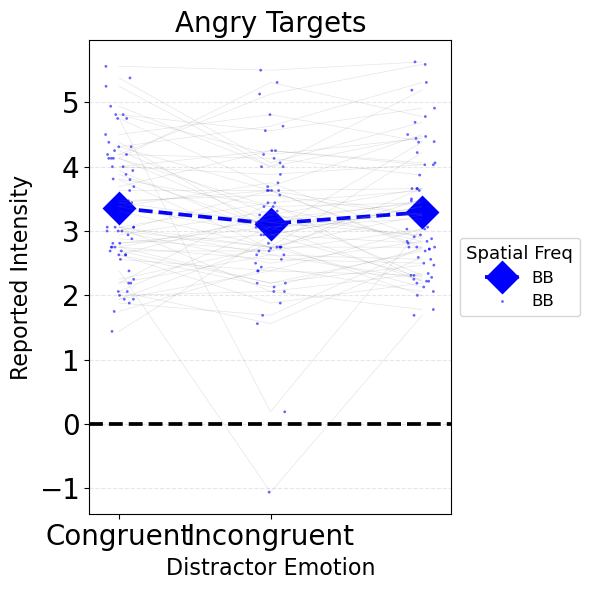

Running this emotion Happy


/var/folders/8y/qc83dfjj59n5z_mp23qjgr240000gn/T/ipykernel_22453/1465151343.py:74: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.pointplot(
/var/folders/8y/qc83dfjj59n5z_mp23qjgr240000gn/T/ipykernel_22453/1465151343.py:74: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(
/var/folders/8y/qc83dfjj59n5z_mp23qjgr240000gn/T/ipykernel_22453/1465151343.py:90: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.stripplot(
/var/folders/8y/qc83dfjj59n5z_mp23qjgr240000gn/T/ipykernel_22453/1465151343.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

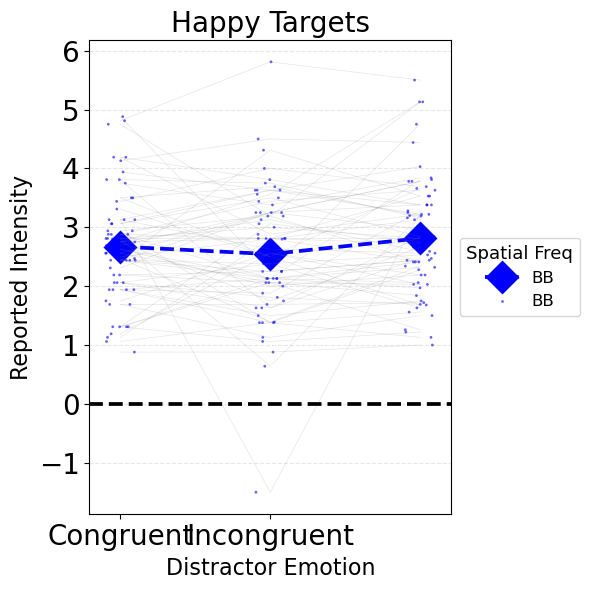

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming e3_df is already loaded and contains the required data
e3_df.columns = e3_df.columns.str.replace('\\', '', regex=False)

# Selected columns including the single trial mean columns
selected_columns = [
    'subID_first_part',
    'cong_angry_transformed',
    'cong_happy_transformed',
    'incong_angry_transformed',
    'incong_happy_transformed',
    'mean_singleTrial_AngryTarget_BB_transformed',
    'mean_singleTrial_HappyTarget_BB_transformed'
]

# Melt the data
df_long = e3_df[selected_columns].melt(
    id_vars='subID_first_part',
    var_name='condition',
    value_name='responses'
)

# Determine 'congruency' with 'single' as a valid level
def extract_congruency(x):
    if x.startswith('cong_'):
        return 'congruent'
    elif x.startswith('incong_'):
        return 'incongruent'
    elif 'mean_singleTrial' in x:
        return 'single'
    else:
        return None

# Extract target emotion from string
def extract_target_emotion(x):
    if 'angry' in x.lower():
        return 'Angry'
    elif 'happy' in x.lower():
        return 'Happy'
    else:
        return None

# Apply functions
df_long['congruency'] = df_long['condition'].apply(extract_congruency)
df_long['targetEmotion'] = df_long['condition'].apply(extract_target_emotion)

# Set spatial frequency
df_long['spatialFreq'] = 'BB'

# Set as categorical (ordered if desired)
df_long['congruency'] = pd.Categorical(df_long['congruency'], categories=['congruent', 'incongruent', 'single'])
df_long['targetEmotion'] = pd.Categorical(df_long['targetEmotion'], categories=['Angry', 'Happy'])
df_long['spatialFreq'] = pd.Categorical(df_long['spatialFreq'], categories=['BB'])

# Define custom palette and markers for visualization
bw_palette = ['blue', 'orange']
bw_markers = ['D', '*']

# Loop through each target emotion
for emotion in df_long['targetEmotion'].unique():
    print(f"Running this emotion {emotion}")
    
    # Create a new figure for each emotion
    plt.figure(figsize=(6, 6))  # Adjust figure size
    
    # Filter the data for the current emotion
    plot_data = df_long[df_long['targetEmotion'] == emotion]
    dodge_val = False  # No need to dodge since spatialFreq is constant ('BB')

    # Plot the pointplot (mean responses)
    sns.pointplot(
        data=plot_data,
        x='congruency',
        y='responses',
        hue='spatialFreq',
        errorbar='se',
        dodge=dodge_val,
        join=False,
        palette=bw_palette,
        markers=bw_markers,
        alpha=1,
        markersize=15,  # Adjust marker size
        linestyles='dashed'  # Dashed line style
    )

    # Overlay the stripplot (single trial data)
    sns.stripplot(
        data=plot_data,
        x='congruency',
        y='responses',
        hue='spatialFreq',
        dodge=False,
        palette=bw_palette,
        marker='o',
        alpha=0.6,
        jitter=True,  # Adds some jitter to avoid overlapping points
        size=2  # Adjust size of individual trial points
    )

    # Add lines to connect individual data points (per participant)
    for subID in plot_data['subID_first_part'].unique():
        # Filter data for the current subID
        sub_data = plot_data[plot_data['subID_first_part'] == subID]
        
        # Map the 'congruency' values to numerical values for plotting
        sub_data['congruency_numeric'] = sub_data['congruency'].map({'congruent': 0, 'incongruent': 1, 'single': 2})
        
        # Sort data by congruency (optional)
        sub_data = sub_data.sort_values('congruency_numeric')
        
        # Plot lines connecting dots for this subID
        plt.plot(sub_data['congruency_numeric'], sub_data['responses'], color='gray', alpha=0.2, linestyle='-', lw=0.5)

    # Optional: Customize margins, spines, etc.
    plt.axhline(y=0, color='black', linestyle='dashed', linewidth=2.7)
    plt.title(f'{emotion} Targets', fontsize=20)
    plt.xlabel('Distractor Emotion', fontsize=16)
    plt.ylabel('Reported Intensity', fontsize=16)
    plt.xticks([0, 1], ['Congruent', 'Incongruent'], fontsize=20)  # Update x-tick labels
    plt.yticks(fontsize=20)
    plt.legend(title='Spatial Freq', fontsize=12, title_fontsize=13, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()

    # Save the figure to file
    plt.savefig(f"figures/e3/jaspfigures_{emotion}.svg", format="svg", dpi=600)

    # Show the plot
    plt.show()


In [ ]:
df_long['targetEmotion'].unique()

/var/folders/8y/qc83dfjj59n5z_mp23qjgr240000gn/T/ipykernel_22453/1114281615.py:139: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(


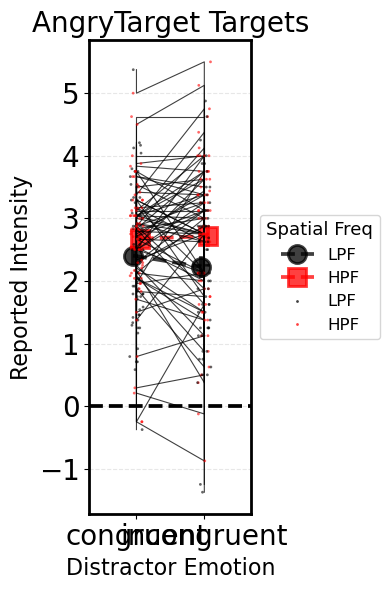

/var/folders/8y/qc83dfjj59n5z_mp23qjgr240000gn/T/ipykernel_22453/1114281615.py:139: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(


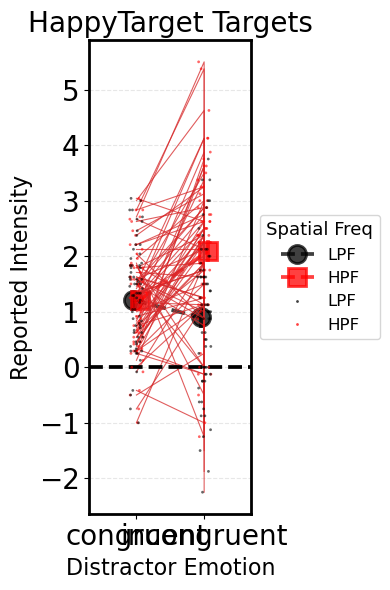

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


color_map = {
    'BB': '#1f77b4',    # blue
    'LPF': 'black',   # green
    'HPF': '#d62728',   # red
}

# Prepare the data
selectedExpID = 1

############################
if selectedExpID == 1:
    e1_df.columns = e1_df.columns.str.replace('\\', '', regex=False)
    selected_columns = [
        'subID_first_part',
        'mean_congruent_AngryTarget_LPF_transformed',
        'mean_congruent_AngryTarget_HPF_transformed',
        'mean_congruent_HappyTarget_HPF_transformed',
        'mean_congruent_HappyTarget_LPF_transformed',
        'mean_incongruent_AngryTarget_HPF_transformed',
        'mean_incongruent_AngryTarget_LPF_transformed',
        'mean_incongruent_HappyTarget_HPF_transformed',
        'mean_incongruent_HappyTarget_LPF_transformed'
    ]

    df_long = e1_df[selected_columns].melt(id_vars='subID_first_part', var_name='condition', value_name='responses')

    df_long[['congruency', 'targetEmotion', 'spatialFreq']] = df_long['condition'].str.extract(
        r'mean_(congruent|incongruent)_(AngryTarget|HappyTarget)_(LPF|HPF)_transformed')
    
    # Define black-and-white palette and markers
    bw_palette = ['black', 'red']
    bw_markers = ['o', 's']

    df_long['congruency'] = pd.Categorical(df_long['congruency'], categories=['congruent', 'incongruent'])
    df_long['spatialFreq'] = pd.Categorical(df_long['spatialFreq'], categories=['LPF', 'HPF'])

if selectedExpID == 2:
    e2_df.columns = e2_df.columns.str.replace('\\', '', regex=False)

    selected_columns = [
        'subID_first_part',
        'mean_congruent_AngryTarget_BB_transformed',
        'mean_congruent_AngryTarget_LPF_transformed',
        'mean_congruent_AngryTarget_HPF_transformed',
        'mean_congruent_HappyTarget_BB_transformed',
        'mean_congruent_HappyTarget_HPF_transformed',
        'mean_congruent_HappyTarget_LPF_transformed',
        'mean_incongruent_AngryTarget_BB_transformed',
        'mean_incongruent_AngryTarget_HPF_transformed',
        'mean_incongruent_AngryTarget_LPF_transformed',
        'mean_incongruent_HappyTarget_BB_transformed',
        'mean_incongruent_HappyTarget_HPF_transformed',
        'mean_incongruent_HappyTarget_LPF_transformed',
    ]

    df_long = e2_df[selected_columns].melt(id_vars='subID_first_part', var_name='condition', value_name='responses')

    # Adjust regex pattern to only capture the necessary parts: congruency, targetEmotion, and spatialFreq
    df_long[['congruency', 'targetEmotion', 'spatialFreq']] = df_long['condition'].str.extract(
        r'mean_(congruent|incongruent)_(AngryTarget|HappyTarget)_(LPF|HPF|BB)')

    # Inspect the extracted data
    print(df_long[['congruency', 'targetEmotion', 'spatialFreq']].head())

    # Define black-and-white palette and markers
    bw_palette = ['black', 'red', 'blue']
    bw_markers = ['o', 's', 'D']

    df_long['congruency'] = pd.Categorical(df_long['congruency'], categories=['congruent', 'incongruent', 'broad-band'])
    df_long['spatialFreq'] = pd.Categorical(df_long['spatialFreq'], categories=['LPF', 'HPF', 'BB'])

if selectedExpID == 3:
    e3_df.columns = e3_df.columns.str.replace('\\', '', regex=False)

    selected_columns = [
        'subID_first_part',
        'cong_angry_transformed',
        'cong_happy_transformed',
        'incong_angry_transformed',
        'incong_happy_transformed',
        'mean_singleTrial_AngryTarget_BB_transformed',
        'mean_singleTrial_HappyTarget_BB_transformed'
    ]

    # Melt the data
    df_long = e3_df[selected_columns].melt(
        id_vars='subID_first_part',
        var_name='condition',
        value_name='responses'
    )

    # Determine 'congruency' with 'single' as a valid level
    def extract_congruency(x):
        if x.startswith('cong_'):
            return 'congruent'
        elif x.startswith('incong_'):
            return 'incongruent'
        elif 'mean_singleTrial' in x:
            return 'single'
        else:
            return None

    # Extract target emotion from string
    def extract_target_emotion(x):
        if 'angry' in x.lower():
            return 'Angry'
        elif 'happy' in x.lower():
            return 'Happy'
        else:
            return None

    # Apply functions
    df_long['congruency'] = df_long['condition'].apply(extract_congruency)
    df_long['targetEmotion'] = df_long['condition'].apply(extract_target_emotion)

    # Set spatial frequency
    df_long['spatialFreq'] = 'BB'

    # Set as categorical (ordered if desired)
    df_long['congruency'] = pd.Categorical(df_long['congruency'], categories=['congruent', 'incongruent', 'single'])
    df_long['targetEmotion'] = pd.Categorical(df_long['targetEmotion'], categories=['Angry', 'Happy'])
    df_long['spatialFreq'] = pd.Categorical(df_long['spatialFreq'], categories=['BB'])

    # Define custom palette and markers for visualization
    bw_palette = ['blue', 'orange']
    bw_markers = ['D', '*']

# Plot one figure per targetEmotion
for emotion in df_long['targetEmotion'].unique():
    plt.figure(figsize=(4, 6))
    plot_data = df_long[df_long['targetEmotion'] == emotion]
    unique_hues = plot_data['spatialFreq'].nunique()
    dodge_val = 0.1 if unique_hues > 1 else False  # disable dodge if only 1 hue level
    ax = sns.pointplot(
        data=plot_data,
        x='congruency',
        y='responses',
        hue='spatialFreq',
        errorbar='se',
        dodge=dodge_val,
        join=False,
        palette=bw_palette,
        markers=bw_markers,
        alpha=1,
        markersize=13,
        linestyles='dashed'
    )

    # Overlay the stripplot (single trial data)
    sns.stripplot(
        data=plot_data,
        x='congruency',
        y='responses',
        hue='spatialFreq',
        dodge=False,
        palette=bw_palette,
        marker='o',
        alpha=0.6,
        jitter=True,  # Adds some jitter to avoid overlapping points
        size=2  # Adjust size of individual trial points
    )

        # Add lines to connect individual data points (per participant)
    # for subID in plot_data['subID_first_part'].unique():
    #     sub_data = plot_data[plot_data['subID_first_part'] == subID]         # Filter data for the current subID
    #     sub_data['congruency_numeric'] = sub_data['congruency'].map({'congruent': 0, 'incongruent': 1})         # Map the 'congruency' values to numerical values for plotting
    #     if selectedExpID == 3:
    #         sub_data['congruency_numeric'] = sub_data['congruency'].map({'congruent': 0, 'incongruent': 1, 'single': 2})         # Map the 'congruency' values to numerical values for plotting
    #     sub_data = sub_data.sort_values('congruency_numeric')# Sort data by congruency (optional)
    #     plt.plot(sub_data['congruency_numeric'], sub_data['responses'], color='gray', alpha=0.2, linestyle='-', lw=0.5)        # Plot lines connecting dots for this subID
    for (subID, targetEmotion), sub_data in plot_data.groupby(['subID_first_part', 'targetEmotion']):
        sub_data = sub_data.copy()

        # Map congruency to numeric for x-axis
        sub_data['congruency_numeric'] = sub_data['congruency'].map({
            'congruent': 0, 'incongruent': 1, 'single': 2
        })

        # For each spatialFreq level (just to be safe)
        for spatialFreq, freq_data in sub_data.groupby('spatialFreq'):
            if freq_data.shape[0] < 2:
                continue  # Need at least 2 points to draw a line

            # Sort for proper plotting
            freq_data = freq_data.sort_values('congruency_numeric')

            line_color = color_map.get(spatialFreq, 'gray')  # get correct color
            plt.plot(freq_data['congruency_numeric'], freq_data['responses'],
                    color=line_color, alpha=0.4, linestyle='-', lw=0.8)


        
    ax.margins(x=0.5)  # move this here, after ax is defined
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    for line in plt.gca().lines:
        line.set_alpha(0.75)  # Set line alpha separately
    #plt.ylim(-0.1, 3.7)


    plt.axhline(y=0, color='black', linestyle='dashed', linewidth = 2.7)

    plt.title(f'{emotion} Targets', fontsize=20)
    plt.xlabel('Distractor Emotion', fontsize=16)
    plt.ylabel('Reported Intensity', fontsize=16)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(title='Spatial Freq', fontsize=12, title_fontsize=13, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"figures/e{selectedExpID}/jaspfigures_{emotion}.svg", format = "svg", dpi = 600)

    plt.show()


In [ ]:


df_subset = e1_df[selected_columns].copy()
df_long = df_subset.melt(id_vars='subID_first_part', var_name='condition', value_name='responses')

# Extract factors
df_long[['congruency', 'targetEmotion', 'spatialFreq']] = df_long['condition'].str.extract(
    r'mean_(congruent|incongruent)_(AngryTarget|HappyTarget)_(LPF|HPF)_transformed'
)
df_long


# Convert congruency to string for clean x-axis handling
df_long['congruency'] = df_long['congruency'].astype(str)

# Plot
g = sns.FacetGrid(df_long, col="targetEmotion", sharey=True)
g.map_dataframe(sns.lineplot, x="congruency", y="responses", hue="spatialFreq", marker="o")

g.add_legend(title="Spatial Frequency")
g.set_axis_labels("Congruency", "Responses")
g.set_titles("Target Emotion: {col_name}")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure factor columns are categorical for proper plotting
e1_df['factorA'] = e1_df['factorA'].astype('category')
e1_df['factorB'] = e1_df['factorB'].astype('category')
e1_df['factorC'] = e1_df['factorC'].astype('category')

# Create the facet grid based on factorC
g = sns.FacetGrid(e1_df, col="factorC", sharey=True)

# Map the lineplot to the grid: x=factorA, y=responses, hue=factorB
g.map_dataframe(sns.lineplot, x="factorA", y="responses", hue="factorB", marker="o")

# Adjust legend and titles
g.add_legend(title="factorB")
g.set_axis_labels("factorA", "Responses")
g.set_titles("factorC: {col_name}")
plt.tight_layout()
plt.show()


In [ ]:

# if selectedExpID == 3:
#     tmpdata = tmpdata[tmpdata.distractorEmotion != "singleTrial"] 

''' doing it with spatial freq for extra '''
runThisSpatialFreq = "collapsed" #\\LPF
# tmpdata = tmpdata[tmpdata.spatialFreqCond == runThisSpatialFreq]


averages_tmpddf = tmpdata.groupby(['subID_first_part', 'distractorEmotion', 'targetEmotion', 'spatialFreqCond']).agg(
    mean=('responseKey', 'mean'),
    std = ('responseKey', 'std'),
    sem=('responseKey', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()
print(averages_tmpddf.head())
if excluded_people:
    averages_tmpddf = averages_tmpddf[~averages_tmpddf.subID_first_part.isin(slopSlidedPeople)]
aov_happy = pg.rm_anova(dv='mean', within=['distractorEmotion', 'spatialFreqCond'], subject='subID_first_part', data=averages_tmpddf[averages_tmpddf.targetEmotion == "HappyTarget"], detailed=True)
aov_angry = pg.rm_anova(dv='mean', within=['distractorEmotion', 'spatialFreqCond'], subject='subID_first_part', data=averages_tmpddf[averages_tmpddf.targetEmotion == "AngryTarget"], detailed=True)
print("below is for happy target results | with spatial frequencies: ")
print(aov_happy)
print("below is for angry target results | with spatial frequencies: ")
print(aov_angry)

''' end of doing it for spatial frequency '''

''' start of collapsed ANOVA cross checking with JASP output '''
averages_tmpddf = tmpdata.groupby(['subID_first_part', 'distractorEmotion', 'targetEmotion']).agg(
    mean=('mapped_response_AngryPositive', 'mean'), #mapped_response_AngryPositive
    std = ('mapped_response_AngryPositive', 'std'),
    sem=('mapped_response_AngryPositive', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()
aov_collapsed = pg.rm_anova(dv='mean', within=['distractorEmotion', 'targetEmotion'], subject='subID_first_part', data=averages_tmpddf, detailed=True)
print("below is for collapsed results: ")
print(aov_collapsed)
''' end of collapsed data ANOVA'''

''' acquiring trial N for exp X'''
count_averages_tmpddf = tmpdata.groupby(['subID_first_part']).agg(
    mean=('responseKey', 'mean'),  # Calculate mean of 'responseKey'
    count=('responseKey', 'size'),  # Count number of rows in each group
).reset_index()
count_averages_tmpddf.to_csv(f"count_averages_tmpddf_e{selectedExpID}.csv")

''' start of the analysis '''
averages_tmpddf = tmpdata.groupby(['subID_first_part', 'distractorEmotion', 'targetEmotion']).agg(
    mean=('mapped_response_AngryPositive', 'mean'), #responseKey
    std = ('mapped_response_AngryPositive', 'std'),
    sem=('mapped_response_AngryPositive', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()
if excluded_people:
    averages_tmpddf = averages_tmpddf[~averages_tmpddf.subID_first_part.isin(slopSlidedPeople)]

custom_palette = {'congruent': 'black', 'incongruent': '#FF2A00', 'others': "darkgray", 'singleTrial': 'blue'} #  ##F8766D}
if not includeOthers:
    averages_tmpddf  = averages_tmpddf[averages_tmpddf.distractorEmotion != "others"]
    custom_palette = {'congruent': 'black','incongruent': '#FF2A00','singleTrial': 'blue'
} #'#FF8F7D' # original: '#F8766D' '#FF2A00'
    
    #flame red
indvDataPointsSize = 100
meanDataPointsSize = 50
#sns.scatterplot(data=averages_tmpddf, x='targetEmotion', y='mean', hue = "distractorEmotion", s=50, alpha = 1/5, color = "black")
sem_mean_of_means = averages_tmpddf.groupby(['targetEmotion', 'distractorEmotion']).agg(mean=('mean', 'mean'), sem=('mean', 'sem')).reset_index()
plt.figure(figsize=(3, 6)) # 3, 5 for spatial freq, 3, 6 for main graphs
scatter_plot = sns.scatterplot(
    data=sem_mean_of_means,  
    x='targetEmotion', 
    y='mean', hue='distractorEmotion', style='distractorEmotion',  markers=['o', 's', 'D'], s=150, palette=custom_palette, alpha = 0.85)
for i in range(len(sem_mean_of_means)):
    color = scatter_plot.collections[0].get_facecolors()[i]
    # plt.errorbar(x=sem_mean_of_means['targetEmotion'][i], y=sem_mean_of_means['mean'][i], yerr=sem_mean_of_means['sem'][i], fmt='none', capsize=5,  alpha = 0.75, linewidth = 2, color='white', zorder=9)
    plt.errorbar(x=sem_mean_of_means['targetEmotion'][i], y=sem_mean_of_means['mean'][i], yerr=sem_mean_of_means['sem'][i], fmt='none', capsize=0,  color=color, alpha = 0.75, linewidth = 3)#color)#scatter_plot.get_lines()[i].get_color())
    #print("running this color:", scatter_plot.get_lines()[i].get_color())
plt.legend(title='Distractor Emotion')
#plt.ylim(-55, 55)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.xlim(-0.5, 1.5)  # Adjust margins as needed
#plt.legend(title='Group Emotion', bbox_to_anchor=(1.05, 1), loc='upper left') #Distractor Emotion
plt.xlabel('', fontsize=25, fontname='Arial') #Target Emotion
plt.ylabel('', fontsize=25, fontname='Arial') #Reported Expression \nIntensity (in %)
plt.xticks(fontsize=25, fontname='Arial', rotation = 0)
plt.yticks(fontsize=25, fontname='Arial')
plt.axhline(y=0, color='black', linestyle='dashed', linewidth = 1.7)
# plt.ylim(-0.5, 4.5)  # Adjust margins as needed
# plt.ylim(-4.5, 4.5)                # Add margin
# plt.yticks(np.arange(-4.5, 5, 0.5))  # includes: [-4.5, -4.0, -3.5, ..., 4.5]
# plt.ylim(-4.5, 4.5)                     # Add margin with 0.5 units on both ends
# plt.yticks(range(-4, 5))               # Show ticks only at whole numbers

# plt.ylim(-0.5, 4.5)  # Set range to ensure grid is visible
plt.ylim(-0.3, 4.5)  # Set range to ensure grid is visible

# plt.yticks(range(-1, 4, 1), labels=[''] * len(range(-1, 4, 1)))  # Hide y-axis labels with step size 1

# Hide y-axis labels but keep grid visible
# plt.yticks(range(-4, 5), labels=[''] * 9)  # Hide y-axis labels
# plt.yticks(range(-1, 3), labels=[''] * 4)  # Hide y-axis labels
plt.yticks(range(0, 5), labels=[''] * 5)  # Ticks at 0, 1, 2, 3 — labels hidden

# plt.yticks(range(-4, 5, 1), labels=[''] * len(range(-4, 5, 1)))  # Hide y-axis labels with step size 1

plt.xticks([0, 1], labels=['', ''])        # Hide x-axis labels
plt.grid(
    axis='both',          # Apply grid to both x and y axes
    linestyle='-',        # Solid line
    color='gray',         # Grid line color
    alpha=0.37,           # Slight transparency for the grid
    linewidth=1.5         # Thicker grid lines for poster display
)
plt.tight_layout()
ax = plt.gca()  # Get current axis
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

if includeOthers:
    plt.savefig(f"figures/e{selectedExpID}/perEmotionLevel_e{selectedExpID}_withOthers_{runThisSpatialFreq}.svg", format = "svg", dpi = 600)
    plt.savefig(f"figures/e{selectedExpID}/pdf/perEmotionLevel_e{selectedExpID}_withOthers_{runThisSpatialFreq}.pdf", format = "pdf", dpi = 600)
if not includeOthers:
    plt.savefig(f"figures/e{selectedExpID}/perEmotionLevel_e{selectedExpID}_{runThisSpatialFreq}.svg", format = "svg", dpi = 600)
    plt.savefig(f"figures/e{selectedExpID}/pdf/perEmotionLevel_e{selectedExpID}_withOthers_{runThisSpatialFreq}.pdf", format = "pdf", dpi = 600)
if excluded_people:
    plt.savefig(f"figures/e{selectedExpID}/excluded_version/perEmotionLevel_e{selectedExpID}_withOthers_{runThisSpatialFreq}.svg", format = "svg", dpi = 600)

plt.show()
# from statsmodels.stats.anova import AnovaRM
# anova_results = AnovaRM(data=melted[melted.emotion == "happy"], 
#                         depvar='value', 
#                         subject='subID_first_part', 
#                         within=['condition']).fit()
# print(anova_results)
aov = pg.rm_anova(dv='mean', within=['targetEmotion', 'distractorEmotion'], subject='subID_first_part', data=averages_tmpddf[averages_tmpddf.distractorEmotion != "singleTrial"], detailed=True)
print("printing anova reuslts of targetEmotion x distractorEmotion on responses (angry and happy on the same scale)",aov)
print("completed final table summary stats:", sem_mean_of_means)

# tukey_results = pg.pairwise_tukey(data=averages_tmpddf, dv='mean', between=['targetEmotion', 'distractorEmotion'])
averages_tmpddf['emotion_pair'] = averages_tmpddf['targetEmotion'] + ' vs ' + averages_tmpddf['distractorEmotion']

# Run Tukey's HSD with the combined 'emotion_pair' column
tukey_results = pg.pairwise_tukey(data=averages_tmpddf, dv='mean', between='emotion_pair', effsize='cohen')
print("\nTukey HSD Post-hoc Results:")
print(tukey_results)

averages_tmpddf.to_csv(f"aggregated_data/e{selectedExpID}/averages_tmpddf_e{selectedExpID}_{runThisSpatialFreq}.csv")

# Pivot the dataframe to wide format
grouped_stats_wide = averages_tmpddf.pivot_table(
    index='subID_first_part',
    columns=['distractorEmotion', 'targetEmotion', 'emotion_pair'],
    values=['mean', 'std', 'sem'],
    aggfunc='mean'
)

# Flatten the MultiIndex columns with a shorter, publication-friendly format
grouped_stats_wide.columns = [
    f"{stat}_{de}_{te}_{pair}"
    for stat, de, te, pair in grouped_stats_wide.columns
]

# Reset index to bring 'subID_first_part' back as a column
grouped_stats_wide = grouped_stats_wide.reset_index()


# grouped_stats_wide.iloc[:, 1:] = grouped_stats_wide.iloc[:, 1:] * 100

# Save the reshaped DataFrame to a CSV
grouped_stats_wide.to_csv(f"aggregated_data/e{selectedExpID}/averages_tmpddf_e{selectedExpID}_wide_{runThisSpatialFreq}.csv", index=False)

# Show the reshaped table
print(grouped_stats_wide)



In [ ]:
averages_tmpddf

In [ ]:

''' with individual dots '''
plt.figure(figsize=(4, 6))
averages_tmpddf3 = tmpdata.groupby(['subID_first_part', 'targetEmotion', 'distractorEmotion']).agg(
    mean=('z_responseKey', 'mean'), #mapped_response_AngryPositive
    std = ('z_responseKey', 'std'),
    sem=('z_responseKey', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()
#sns.boxplot(data=averages_tmpddf, x='distractorEmotion', y='mean', color = "white")
if excluded_people:
    averages_tmpddf3 = averages_tmpddf3[~averages_tmpddf3.subID_first_part.isin(slopSlidedPeople)]

if not includeOthers:
    averages_tmpddf3 = averages_tmpddf3[averages_tmpddf3.distractorEmotion != "others"]
sem_mean_of_means = averages_tmpddf3.groupby([ 'distractorEmotion', 'targetEmotion']).agg(mean=('mean', 'mean'), sem=('mean', 'sem')).reset_index()
sns.lineplot(data=averages_tmpddf3, x='targetEmotion', y='mean', style='targetEmotion', marker=None, dashes=False, alpha=0.15, legend=None, markersize = 8, color = (180/255, 180/255, 180/255))
#sns.lineplot(data=averages_tmpddf2, x='distractorEmotion', y='mean', hue='distractorEmotion', style='distractorEmotion', markers=["o", "*"], dashes=False, alpha=0.5, legend=None, markersize=8,  palette={ 'congruent': 'black', 'incongruent': 'red'}) #  # Use hue to map colors based on distractorEmotion
sns.lineplot(
    data=averages_tmpddf3,
    x='targetEmotion',
    y='mean',
    hue='distractorEmotion',  # Different colors for distractorEmotion levels
    style='distractorEmotion',  # Different markers for distractorEmotion levels
    markers=['o', 's', 'D'],  # Define marker styles
    dashes=False,  # Solid lines
    alpha=0.05,
    markersize=6,
    palette={'congruent': 'black', 'incongruent': 'black', 'singleTrial': 'blue', 'others': 'gray'},  # Custom palette for distractorEmotion ##F8766D
    units='subID_first_part',  # Ensures lines connect within each subID_first_part
    estimator=None  # Plot raw data without aggregation
)
sns.lineplot(data=sem_mean_of_means, x='targetEmotion', y='mean', style = "distractorEmotion", marker= None, dashes=False, alpha=0.75, color = "black", legend=None, linewidth = 4)
sns.lineplot(data=sem_mean_of_means, x='targetEmotion', y='mean', style = "distractorEmotion", markers=['o', 's', 'D'], dashes=False, alpha=0.86, color = (255/255, 255/255, 255/255), legend=None, markersize = 12, markeredgecolor='black',  markeredgewidth=2)
# for i in range(len(sem_mean_of_means)):
#     color = scatter_plot.collections[0].get_facecolors()[i]
#     plt.errorbar(x=sem_mean_of_means['distractorEmotion'][i], y=sem_mean_of_means['mean'][i], yerr=sem_mean_of_means['sem'][i], fmt='none', capsize=0,  color=color)#color)#scatter_plot.get_lines()[i].get_color())

# Customize the plot
plt.title(f'') #Response as a Function of distractorEmotion with Mean Values | targetEmotion together | e{selectedExpID} 
plt.ylabel('') #Response
plt.title('') #f'collapsed | e{selectedExpID} '
plt.xlabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Target-Distractor Emotional Congruency
plt.ylabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Reported Facial Expression Intensity
plt.xticks(fontsize=16, fontweight='regular', fontname='Times New Roman')  #, rotation = 45
plt.yticks(fontsize=16, fontweight='regular', fontname='Times New Roman')
plt.ylim(-6.5, 6.5)
plt.grid(axis='y', linestyle='-', color='gray', alpha=0.37, linewidth = 1)
current_xlim = plt.gca().get_xlim()
plt.xlim(current_xlim[0] - 0.5, current_xlim[1] + 0.5)  # Adjust these values as needed
plt.tight_layout()
plt.axhline(y=0, color='black', linestyle='dashed', linewidth = 1.7)
ax = plt.gca()  # Get current axis
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.savefig(f"../figures/e{selectedExpID}/excluded_version/perTargetEmotion.svg", format = "svg", dpi = 600)

''' END OF - with individual dots '''
#
''' '''
plt.figure(figsize=(4, 6))
averages_tmpddf2 = tmpdata.groupby(['subID_first_part', 'distractorEmotion']).agg(
    mean=('mapped_response_AngryPositive_z_transformed', 'mean'), #mapped_response_AngryPositive_z_transformed
    std = ('mapped_response_AngryPositive_z_transformed', 'std'),
    sem=('mapped_response_AngryPositive_z_transformed', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()
if excluded_people:
    averages_tmpddf2 = averages_tmpddf2[~averages_tmpddf2.subID_first_part.isin(slopSlidedPeople)]

#sns.boxplot(data=averages_tmpddf, x='distractorEmotion', y='mean', color = "white")

if not includeOthers:
    averages_tmpddf2 = averages_tmpddf2[averages_tmpddf2.distractorEmotion != "others"]
sem_mean_of_means = averages_tmpddf2.groupby([ 'distractorEmotion']).agg(mean=('mean', 'mean'), sem=('mean', 'sem')).reset_index()

sns.lineplot(data=averages_tmpddf2, x='distractorEmotion', y='mean', style='subID_first_part', marker=None, dashes=False, alpha=0.15, legend=None, markersize = 8, color = (180/255, 180/255, 180/255))
#sns.lineplot(data=averages_tmpddf2, x='distractorEmotion', y='mean', hue='distractorEmotion', style='distractorEmotion', markers=["o", "*"], dashes=False, alpha=0.5, legend=None, markersize=8,  palette={ 'congruent': 'black', 'incongruent': 'red'}) #  # Use hue to map colors based on distractorEmotion
sns.lineplot(
    data=averages_tmpddf2,
    x='distractorEmotion',
    y='mean',
    hue='distractorEmotion',  # Different colors for distractorEmotion levels
    style='distractorEmotion',  # Different markers for distractorEmotion levels
    markers=['o', 's', 'D'],  # Define marker styles
    dashes=False,  # Solid lines
    alpha=0.2,
    markersize=6,
    palette={'congruent': 'black', 'incongruent': 'black', 'singleTrial': 'blue', 'others': 'gray'},  # Custom palette for distractorEmotion ##F8766D
    units='subID_first_part',  # Ensures lines connect within each subID_first_part
    estimator=None  # Plot raw data without aggregation
)
sns.lineplot(data=sem_mean_of_means, x='distractorEmotion', y='mean', marker= None, dashes=False, alpha=0.92, color = "black", legend=None, linewidth = 4)

sns.lineplot(data=sem_mean_of_means, x='distractorEmotion', y='mean', style = "distractorEmotion", markers=['o', 's', 'D'], dashes=False, alpha=0.92, color = (255/255, 255/255, 255/255), legend=None, markersize = 12, markeredgecolor='black',  markeredgewidth=2)
# for i in range(len(sem_mean_of_means)):
#     color = scatter_plot.collections[0].get_facecolors()[i]
#     plt.errorbar(x=sem_mean_of_means['distractorEmotion'][i], y=sem_mean_of_means['mean'][i], yerr=sem_mean_of_means['sem'][i], fmt='none', capsize=0,  color=color)#color)#scatter_plot.get_lines()[i].get_color())

# Customize the plot
plt.title(f'') #Response as a Function of distractorEmotion with Mean Values | targetEmotion together | e{selectedExpID} 
plt.ylabel('') #Response
plt.title('') #f'collapsed | e{selectedExpID} '
plt.xlabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Target-Distractor Emotional Congruency
plt.ylabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Reported Facial Expression Intensity
plt.xticks(fontsize=16, fontweight='regular', fontname='Times New Roman')  #, rotation = 45
plt.yticks(fontsize=16, fontweight='regular', fontname='Times New Roman')
plt.ylim(-6.5, 6.5)
plt.grid(axis='y', linestyle='-', color='gray', alpha=0.37, linewidth = 1)
current_xlim = plt.gca().get_xlim()
plt.xlim(current_xlim[0] - 0.5, current_xlim[1] + 0.5)  # Adjust these values as needed
plt.tight_layout()
plt.axhline(y=0, color='black', linestyle='dashed', linewidth = 1.7)
ax = plt.gca()  # Get current axis
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
if includeOthers:
    plt.savefig(f"../figures/e{selectedExpID}/perCollapsed_e{selectedExpID}_withFearfulCond.svg", format = "svg", dpi = 600)
    plt.savefig(f"../figures/e{selectedExpID}/pdf/perCollapsed_e{selectedExpID}_withFearfulCond.pdf", format = "pdf", dpi = 600)
if not includeOthers:
    plt.savefig(f"../figures/e{selectedExpID}/perCollapsed_e{selectedExpID}.svg", format = "svg", dpi = 600)
    plt.savefig(f"../figures/e{selectedExpID}/pdf/perCollapsed_e{selectedExpID}.pdf", format = "pdf", dpi = 600)
if excluded_people:
    plt.savefig(f"../figures/e{selectedExpID}/excluded_version/perCollapsed_e{selectedExpID}_cleaned.svg", format = "svg", dpi = 600)

plt.show()
aov = pg.rm_anova(dv='mean', within=['distractorEmotion'], subject='subID_first_part', data=averages_tmpddf2, detailed=True)
print("printing the results of the basic anova with DistractorEmotion (congruent vs incongruent)")
print(aov)

if aov['p-unc'][0] < 0.05:
    tukey_results = pg.pairwise_tukey(data=averages_tmpddf2, dv='mean', between='distractorEmotion')
    print("\nTukey HSD Post-hoc Results:")
    print(tukey_results)
else:
    print("\nNo significant difference found in the ANOVA.")

print("now running a t-test")
from scipy.stats import ttest_rel

pivot_df = averages_tmpddf2.pivot(index='subID_first_part', columns='distractorEmotion', values='mean')
pivot_df = pivot_df.dropna(subset=['congruent', 'incongruent']) # Drop rows with missing values in either condition (if any)
congruent_means = pivot_df['congruent']
incongruent_means = pivot_df['incongruent']
print("Performing the paired t-test...")
t_stat, p_value = ttest_rel(congruent_means, incongruent_means)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')
pivot_df['mean_diff'] = pivot_df['congruent'] - pivot_df['incongruent'] ## Calculate mean differences
differences = pivot_df['mean_diff']
# Calculate mean and standard deviation of differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)  # ddof=1 for sample standard deviation
# Calculate Cohen's d
cohen_d = mean_diff / std_diff
# Calculate degrees of freedom
n = len(pivot_df)  # Number of pairs (subjects)
df = n - 1
print(f'Mean Difference: {mean_diff}')
print(f'Standard Deviation of Differences: {std_diff}')
print(f'Cohen\'s d: {cohen_d}')
print(f'Degrees of Freedom: {df}')

# doing the same t-test with pinguin this time:
ttest_results = pg.ttest(
    pivot_df['congruent'],
    pivot_df['incongruent'],
    paired=True
)
# Print the results with the correct column names
print(ttest_results[['T', 'p-val', 'cohen-d']].round(3))

# Calculate the mean difference manually
resp_cong = pivot_df['congruent'].mean()
resp_incong = pivot_df['incongruent'].mean()

print(f"responses to congruent: {resp_cong:.3f}")
print(f"responses to incongruent: {resp_incong:.3f}")
print(f"Degrees of freedom: {ttest_results['dof'].iloc[0]}")
if selectedExpID == 3:

    # now doing it for single comparisions
    # single vs incong
    ttest_results = pg.ttest(
        pivot_df['singleTrial'],
        pivot_df['incongruent'],
        paired=True
    )
    # Print the results with the correct column names
    print(ttest_results[['T', 'p-val', 'cohen-d']].round(3))

    # Calculate the mean difference manually
    resp_singleTrial = pivot_df['singleTrial'].mean()
    resp_incong = pivot_df['incongruent'].mean()

    print(f"responses to singleTrial: {resp_singleTrial:.3f}")
    print(f"responses to incongruent: {resp_incong:.3f}")
    print(f"Degrees of freedom: {ttest_results['dof'].iloc[0]}")
    # single vs cong
    ttest_results = pg.ttest(
        pivot_df['singleTrial'],
        pivot_df['congruent'],
        paired=True
    )
    # Print the results with the correct column names
    print(ttest_results[['T', 'p-val', 'cohen-d']].round(3))

    # Calculate the mean difference manually
    resp_singleTrial = pivot_df['singleTrial'].mean()
    resp_cong = pivot_df['congruent'].mean()

    print(f"responses to singleTrial: {resp_singleTrial:.3f}")
    print(f"responses to cong: {resp_cong:.3f}")
    print(f"Degrees of freedom: {ttest_results['dof'].iloc[0]}")


''' aperture '''
# now moving onto expression-trajectory bias scripts #

#if (selectedExpID == 2) | (selectedExpID == 3):
    # Define the unique aperture values
mask1 = ((tmpdata.targetStrength == 6) & (tmpdata.up_log == True))
mask2 = ((tmpdata.targetStrength == 31) & (tmpdata.up_log == True))
mask3 = ((tmpdata.targetStrength == 31) & (tmpdata.up_log == False))
mask4 = ((tmpdata.targetStrength == 6) & (tmpdata.up_log == False))
tmpdata.loc[mask1, 'aperture'] = 1
tmpdata.loc[mask2, 'aperture'] = 2
tmpdata.loc[mask3, 'aperture'] = 3
tmpdata.loc[mask4, 'aperture'] = 4

# if (selectedExpID == 1):
#     # Define the unique aperture values
#     mask1 = ((tmpdata.targetStrength == "6") & (tmpdata.up_log == "TRUE"))
#     mask2 = ((tmpdata.targetStrength == "31") & (tmpdata.up_log == "TRUE"))
#     mask3 = ((tmpdata.targetStrength == "31") & (tmpdata.up_log == "FALSE"))
#     mask4 = ((tmpdata.targetStrength == "6") & (tmpdata.up_log == "FALSE"))
#     tmpdata.loc[mask1, 'aperture'] = 1
#     tmpdata.loc[mask2, 'aperture'] = 2
#     tmpdata.loc[mask3, 'aperture'] = 3
#     tmpdata.loc[mask4, 'aperture'] = 4


averages_tmpddf = tmpdata.groupby(['subID_first_part', 'distractorEmotion', 'targetEmotion', 'aperture']).agg(
    mean=('z_responseKey', 'mean'),
    std = ('z_responseKey', 'std'),
    sem=('z_responseKey', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()
print(averages_tmpddf.head())
if excluded_people:
    averages_tmpddf = averages_tmpddf[~averages_tmpddf.subID_first_part.isin(slopSlidedPeople)]


# if selectedExpID == 3:
#     slopSlidedPeople = ['AV_17', 'AV_18', 'AV_20', 'AV_21', 'AV_24', 'AV_34', 'AV_43', 'AV_51', 'AV_66'] # nine people; actually eight because I think AV_20 should be included
#     # adding a new participant called : FFF_64
# if selectedExpID == 2:
#     slopSlidedPeople = ['FFD_07', 'FFD_21', 'FFD_26', 'FFD_35', 'FFD_59', 'FFD_70', 'FFD_77_78Aslinda', 'FFD_83'] # eight people
# if selectedExpID == 1: 
#     slopSlidedPeople = ['B42', 'B44', 'B81'] # three people
# averages_tmpddf_removedSlopeSlidedPeople = averages_tmpddf[~averages_tmpddf.subID_first_part.isin(slopSlidedPeople)]

#sns.scatterplot(data=averages_tmpddf, x='targetEmotion', y='mean', hue = "distractorEmotion", s=50, alpha = 1/5, color = "black")
mean_of_means = averages_tmpddf.groupby(['targetEmotion', 'distractorEmotion', 'aperture']).agg(mean=('mean', 'mean')).reset_index()
sem_mean_of_means = averages_tmpddf.groupby(['targetEmotion', 'distractorEmotion', 'aperture']).agg(sem=('mean', 'sem')).reset_index()


targetEmotions = mean_of_means['targetEmotion'].unique()
targetEmotions
# Create subplots
fig, axes = plt.subplots(1, len(targetEmotions), figsize=(4 * len(targetEmotions), 6), sharex=True, sharey=True)

# Custom color palette
custom_palette = {'group': 'black', 'single' : "purple"}
custom_palette = {
    'congruent': 'black',
    'incongruent': '#F8766D',
    'others': "darkgray",
    'singleTrial': 'blue'
}
# Loop through each aperture and create a subplot
for ax, targetEmo in zip(axes, targetEmotions):
    # Filter data for the current aperture
    subset_mean = mean_of_means[mean_of_means['targetEmotion'] == targetEmo]
    subset_sem = sem_mean_of_means[sem_mean_of_means['targetEmotion'] == targetEmo]
    
    # Create the scatter plot with hue
    scatter_plot = sns.scatterplot(ax=ax, data=subset_mean, 
                                   x='aperture', 
                                   y='mean', 
                                   hue='distractorEmotion', 
                                    style='distractorEmotion', 
                                   s=130, 
                                   palette=custom_palette, alpha = 0.92,
                                   markers=['o', 's', 'D'])

    # Add error bars manually
    for i in range(len(subset_mean)):
        color = scatter_plot.collections[0].get_facecolors()[i]
        ax.errorbar(x=subset_mean['aperture'].iloc[i], 
                    y=subset_mean['mean'].iloc[i], 
                    yerr=subset_sem['sem'].iloc[i], 
                    fmt='none', 
                    capsize=10, 
                    color=color, linewidth = 2, alpha = 0.92)
    
    # Set title and legend
    ax.set_title(f'') #e{selectedExpID} 
    #ax.legend(title='Group Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.axhline(y=0, color='black', linestyle='--', lw= 2)
    ax.grid(axis='y', linestyle='-', color='gray', alpha=0.37, linewidth = 1)
    #ax = plt.gca()  # Get current axis
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
plt.xlabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Target Presentation Timepoint
plt.ylabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Reported Facial Expression Intensity
plt.xticks([1, 2, 3, 4], fontsize=16, fontweight='regular', fontname='Times New Roman') #, rotation = 45
# plt.yticks(np.arange(-6, 7, 1), fontsize=16, fontweight='regular', fontname='Times New Roman')
current_xlim = plt.gca().get_xlim()
plt.xlim(current_xlim[0] - 0.3, current_xlim[1] + 0.3)  # Adjust these values as needed
plt.tight_layout()
# plt.ylim(-5.5, 5.5)
plt.xlim(0.5, 4.5)  # Adjust as needed to fit the data points

plt.savefig(f"../figures/e{selectedExpID}/trajector_bias_graph_e{selectedExpID}.svg", format = "svg", dpi = 600)
plt.savefig(f"../figures/e{selectedExpID}/pdf/trajector_bias_graph_e{selectedExpID}.pdf", format = "pdf", dpi = 600)
if excluded_people:
    plt.savefig(f"../figures/e{selectedExpID}/excluded_version/trajector_bias_graph_e{selectedExpID}.svg", format = "svg", dpi = 600)
plt.show()


from statsmodels.stats.anova import AnovaRM
# anova_results = AnovaRM(data=melted[melted.emotion == "happy"], 
#                         depvar='value', 
#                         subject='subID', 
#                         within=['condition']).fit()
# print(anova_results)
import pingouin as pg
print("below is for happy target results")
aov_happy = pg.rm_anova(dv='mean', within=['distractorEmotion', 'aperture'], subject='subID_first_part', data=averages_tmpddf[averages_tmpddf.targetEmotion == "HappyTarget"], detailed=True)
aov_angry = pg.rm_anova(dv='mean', within=['distractorEmotion', 'aperture'], subject='subID_first_part', data=averages_tmpddf[averages_tmpddf.targetEmotion == "AngryTarget"], detailed=True)
print("below is for happy target results")
print(aov_happy)
print("below is for angry target results")
print(aov_angry)




In [ ]:
# ''' '''
# selectedExpID = 1

# if selectedExpID == 1:
#     tmpdata = e1data 
# if selectedExpID == 2:
#     tmpdata = e2data 
# if selectedExpID == 3:
#     tmpdata = e3data
# print("this many subID_first_part participants", len(tmpdata['subID_first_part'].unique()))
# mapping = {str(i): i for i in range(-8, 9)}  # this mapping is basically to convert the string into numbers ('8' mapped to 8)
# tmpdata['responseKey'] = tmpdata['responseKey'].map(mapping).fillna(tmpdata['responseKey'])
# #tmpdata['responseKey'] = pd.to_numeric(tmpdata['responseKey'], errors='coerce') # this should work the same way above. 
# tmpdata_clean = tmpdata.dropna(subset=['stimOrg']) # to clean the rows with irregular data types; it should work the same way as the following, nan_rows = tmpdata[tmpdata['stimOrg'].isna()]
# tmpdata = tmpdata_clean
# ''' assingning new variables/columns'''
# tmpdata['distractorEmotion'] = tmpdata['stimOrg'].apply(categorizeDistractorEmotion)
# tmpdata['targetEmotion'] = tmpdata['stimOrg'].apply(categorizeTargetEmotion)
# tmpdata['mapped_response_AngryPositive'] = tmpdata.apply(lambda row: row['responseKey'] if row['targetEmotion'] == 'HappyTarget' else row['responseKey'] * -1, axis=1)
# tmpdata['targetEmotion'] = tmpdata['stimOrg'].apply(categorizeTargetEmotion)
# if selectedExpID == 3:
#     tmpdata = tmpdata[tmpdata.distractorEmotion != "singleTrial"] 


# plt.figure(figsize=(4, 6))
# tmpdata2 = tmpdata[tmpdata.targetEmotion == "AngryTarget"]
# averages_tmpddf2 = tmpdata2.groupby(['subID_first_part', 'distractorEmotion']).agg(
#     mean=('responseKey', 'mean'), #mapped_response_AngryPositive
#     std = ('responseKey', 'std'),
#     sem=('responseKey', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
# ).reset_index()
# #sns.boxplot(data=averages_tmpddf, x='distractorEmotion', y='mean', color = "white")
# if not includeOthers:
#     averages_tmpddf2 = averages_tmpddf2[averages_tmpddf2.distractorEmotion != "others"]
# sem_mean_of_means = averages_tmpddf2.groupby([ 'distractorEmotion']).agg(mean=('mean', 'mean'), sem=('mean', 'sem')).reset_index()

# sns.lineplot(data=averages_tmpddf2, x='distractorEmotion', y='mean', style='subID_first_part', marker=None, dashes=False, alpha=0.15, legend=None, markersize = 8, color = "darkgray")
# #sns.lineplot(data=averages_tmpddf2, x='distractorEmotion', y='mean', hue='distractorEmotion', style='distractorEmotion', markers=["o", "*"], dashes=False, alpha=0.5, legend=None, markersize=8,  palette={ 'same-emotion-group': 'black', 'dife-emotion-group': 'red'}) #  # Use hue to map colors based on distractorEmotion
# sns.lineplot(
#     data=averages_tmpddf2,
#     x='distractorEmotion',
#     y='mean',
#     hue='distractorEmotion',  # Different colors for distractorEmotion levels
#     style='distractorEmotion',  # Different markers for distractorEmotion levels
#     markers=['o', 's'],  # Define marker styles
#     dashes=False,  # Solid lines
#     alpha=0.2,
#     markersize=8,
#     palette={'same-emotion-group': 'black', 'dife-emotion-group': '#F8766D', 'singleTrial': 'blue', 'others': 'gray'},  # Custom palette for distractorEmotion
#     units='subID_first_part',  # Ensures lines connect within each subID_first_part
#     estimator=None  # Plot raw data without aggregation
# )
# sns.lineplot(data=sem_mean_of_means, x='distractorEmotion', y='mean', marker= None, dashes=False, alpha=0.92, color = "black", legend=None, linewidth = 4)

# sns.lineplot(data=sem_mean_of_means, x='distractorEmotion', y='mean', style = "distractorEmotion", markers=['o', 's'], dashes=False, alpha=0.92, color = "gray", legend=None, markersize = 12, markeredgecolor='black',  markeredgewidth=2)
# # for i in range(len(sem_mean_of_means)):
# #     color = scatter_plot.collections[0].get_facecolors()[i]
# #     plt.errorbar(x=sem_mean_of_means['distractorEmotion'][i], y=sem_mean_of_means['mean'][i], yerr=sem_mean_of_means['sem'][i], fmt='none', capsize=0,  color=color)#color)#scatter_plot.get_lines()[i].get_color())

# # Customize the plot
# plt.title(f'') #Response as a Function of distractorEmotion with Mean Values | targetEmotion together | e{selectedExpID} 
# plt.ylabel('') #Response
# plt.title('') #f'collapsed | e{selectedExpID} '
# plt.xlabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Target-Distractor Emotional Congruency
# plt.ylabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Reported Facial Expression Intensity
# plt.xticks(fontsize=18, fontweight='regular', fontname='Times New Roman', rotation = 45) 
# plt.yticks(fontsize=18, fontweight='regular', fontname='Times New Roman')
# plt.ylim(-6, 6)
# plt.grid(axis='y', linestyle='-', color='gray', alpha=0.37, linewidth = 1)
# current_xlim = plt.gca().get_xlim()
# plt.xlim(current_xlim[0] - 0.3, current_xlim[1] + 0.3)  # Adjust these values as needed
# plt.axhline(y=0, color='black', linestyle='dashed', linewidth = 1.7)
# if includeOthers:
#     plt.savefig(f"figures/e{selectedExpID}/perCollapsed_e{selectedExpID}_withFearfulCond.svg", format = "svg", dpi = 600)
# else:
#     plt.savefig(f"figures/e{selectedExpID}/perCollapsed_e{selectedExpID}.svg", format = "svg", dpi = 600)
# plt.show()
# aov = pg.rm_anova(dv='mean', within=['distractorEmotion'], subject='subID_first_part', data=averages_tmpddf2, detailed=True)
# print(aov)


In [ ]:
# ''' '''
# selectedExpID = 1

# if selectedExpID == 1:
#     tmpdata = e1data 
# if selectedExpID == 2:
#     tmpdata = e2data 
# if selectedExpID == 3:
#     tmpdata = e3data
# print("this many subID_first_part participants", len(tmpdata['subID_first_part'].unique()))
# mapping = {str(i): i for i in range(-8, 9)}  # this mapping is basically to convert the string into numbers ('8' mapped to 8)
# tmpdata['responseKey'] = tmpdata['responseKey'].map(mapping).fillna(tmpdata['responseKey'])
# #tmpdata['responseKey'] = pd.to_numeric(tmpdata['responseKey'], errors='coerce') # this should work the same way above. 
# tmpdata_clean = tmpdata.dropna(subset=['stimOrg']) # to clean the rows with irregular data types; it should work the same way as the following, nan_rows = tmpdata[tmpdata['stimOrg'].isna()]
# tmpdata = tmpdata_clean
# ''' assingning new variables/columns'''
# tmpdata['distractorEmotion'] = tmpdata['stimOrg'].apply(categorizeDistractorEmotion)
# tmpdata['targetEmotion'] = tmpdata['stimOrg'].apply(categorizeTargetEmotion)
# tmpdata['mapped_response_AngryPositive'] = tmpdata.apply(lambda row: row['responseKey'] if row['targetEmotion'] == 'HappyTarget' else row['responseKey'] * -1, axis=1)
# tmpdata['targetEmotion'] = tmpdata['stimOrg'].apply(categorizeTargetEmotion)
# if selectedExpID == 3:
#     tmpdata = tmpdata[tmpdata.distractorEmotion != "singleTrial"] 


# plt.figure(figsize=(4, 6))
# tmpdata2 = tmpdata[tmpdata.targetEmotion == "HappyTarget"]
# averages_tmpddf2 = tmpdata2.groupby(['subID_first_part', 'distractorEmotion']).agg(
#     mean=('responseKey', 'mean'), #mapped_response_AngryPositive
#     std = ('responseKey', 'std'),
#     sem=('responseKey', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
# ).reset_index()
# #sns.boxplot(data=averages_tmpddf, x='distractorEmotion', y='mean', color = "white")
# if not includeOthers:
#     averages_tmpddf2 = averages_tmpddf2[averages_tmpddf2.distractorEmotion != "others"]
# sem_mean_of_means = averages_tmpddf2.groupby([ 'distractorEmotion']).agg(mean=('mean', 'mean'), sem=('mean', 'sem')).reset_index()

# sns.lineplot(data=averages_tmpddf2, x='distractorEmotion', y='mean', style='subID_first_part', marker=None, dashes=False, alpha=0.15, legend=None, markersize = 8, color = "darkgray")
# #sns.lineplot(data=averages_tmpddf2, x='distractorEmotion', y='mean', hue='distractorEmotion', style='distractorEmotion', markers=["o", "*"], dashes=False, alpha=0.5, legend=None, markersize=8,  palette={ 'same-emotion-group': 'black', 'dife-emotion-group': 'red'}) #  # Use hue to map colors based on distractorEmotion
# sns.lineplot(
#     data=averages_tmpddf2,
#     x='distractorEmotion',
#     y='mean',
#     hue='distractorEmotion',  # Different colors for distractorEmotion levels
#     style='distractorEmotion',  # Different markers for distractorEmotion levels
#     markers=['o', 's'],  # Define marker styles
#     dashes=False,  # Solid lines
#     alpha=0.2,
#     markersize=8,
#     palette={'same-emotion-group': 'black', 'dife-emotion-group': '#F8766D', 'singleTrial': 'blue', 'others': 'gray'},  # Custom palette for distractorEmotion
#     units='subID_first_part',  # Ensures lines connect within each subID_first_part
#     estimator=None  # Plot raw data without aggregation
# )
# sns.lineplot(data=sem_mean_of_means, x='distractorEmotion', y='mean', marker= None, dashes=False, alpha=0.92, color = "black", legend=None, linewidth = 4)

# sns.lineplot(data=sem_mean_of_means, x='distractorEmotion', y='mean', style = "distractorEmotion", markers=['o', 's'], dashes=False, alpha=0.92, color = "gray", legend=None, markersize = 12, markeredgecolor='black',  markeredgewidth=2)
# # for i in range(len(sem_mean_of_means)):
# #     color = scatter_plot.collections[0].get_facecolors()[i]
# #     plt.errorbar(x=sem_mean_of_means['distractorEmotion'][i], y=sem_mean_of_means['mean'][i], yerr=sem_mean_of_means['sem'][i], fmt='none', capsize=0,  color=color)#color)#scatter_plot.get_lines()[i].get_color())

# # Customize the plot
# plt.title(f'') #Response as a Function of distractorEmotion with Mean Values | targetEmotion together | e{selectedExpID} 
# plt.ylabel('') #Response
# plt.title('') #f'collapsed | e{selectedExpID} '
# plt.xlabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Target-Distractor Emotional Congruency
# plt.ylabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Reported Facial Expression Intensity
# plt.xticks(fontsize=18, fontweight='regular', fontname='Times New Roman') 
# plt.yticks(fontsize=18, fontweight='regular', fontname='Times New Roman')
# plt.ylim(-6, 6)
# plt.grid(axis='y', linestyle='-', color='gray', alpha=0.37, linewidth = 1)
# current_xlim = plt.gca().get_xlim()
# plt.xlim(current_xlim[0] - 0.3, current_xlim[1] + 0.3)  # Adjust these values as needed
# plt.axhline(y=0, color='black', linestyle='dashed', linewidth = 1.7)
# if includeOthers:
#     plt.savefig(f"figures/e{selectedExpID}/perCollapsed_e{selectedExpID}_withFearfulCond.svg", format = "svg", dpi = 600)
# else:
#     plt.savefig(f"figures/e{selectedExpID}/perCollapsed_e{selectedExpID}.svg", format = "svg", dpi = 600)
# plt.show()
# aov = pg.rm_anova(dv='mean', within=['distractorEmotion'], subject='subID_first_part', data=averages_tmpddf2, detailed=True)
# print(aov)


In [ ]:
averages_tmpddf = tmpdata.groupby(['subID_first_part', 'distractorEmotion', 'targetEmotion', 'aperture']).agg(
    mean=('responseKey', 'mean'),
    std = ('responseKey', 'std'),
    sem=('responseKey', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()
print(averages_tmpddf.head())
if excluded_people:
    averages_tmpddf = averages_tmpddf[~averages_tmpddf.subID_first_part.isin(slopSlidedPeople)]

data_pivot = averages_tmpddf.pivot_table(index=['subID_first_part', 'distractorEmotion', 'targetEmotion'], 
                              columns='aperture', 
                              values=['mean', 'std', 'sem'])

data_pivot

# Flatten the MultiIndex columns
data_pivot.columns = [f'{stat}_aperture_{aperture}' for stat, aperture in data_pivot.columns]
data_pivot.reset_index(inplace=True)
data_pivot['t4_minus_t1'] = (data_pivot['mean_aperture_4.0'] - data_pivot['mean_aperture_1.0'])
data_pivot['t3_minus_t2'] = (data_pivot['mean_aperture_3.0'] - data_pivot['mean_aperture_2.0'])
data_long = pd.melt(data_pivot[data_pivot.targetEmotion == "HappyTarget"], id_vars=['subID_first_part', 'distractorEmotion'], value_vars=['t4_minus_t1', 't3_minus_t2'], var_name='Variable', value_name='Value')


#### Start OF doing avg(1, 2) and avg(3, 4) comparison with box plot ####
data_pivot['avg_1_2'] = ((data_pivot['mean_aperture_1.0'] + data_pivot['mean_aperture_2.0']))/2
data_pivot['avg_3_4'] = ((data_pivot['mean_aperture_3.0'] + data_pivot['mean_aperture_4.0']))/2
data_long = pd.melt(data_pivot[data_pivot.targetEmotion == "HappyTarget"], id_vars=['subID_first_part', 'distractorEmotion'], value_vars=['avg_1_2', 'avg_3_4'], var_name='Variable', value_name='Value')
print(data_long)
sns.barplot(data=data_long, x='Variable', y='Value', hue='distractorEmotion', palette=custom_palette)
plt.title("happy targets")
#plt.savefig(f"S24_analysis/figures/persistence/e{selectedExpID}_happyTargets_12_34_averages.svg", format = "svg", dpi = 600)
plt.show()
aov_happy = pg.rm_anova(dv='Value', within=['distractorEmotion', 'Variable'], subject='subID_first_part', data=data_long, detailed=True)
#print(aov_happy)
print(aov_happy.to_string())
data_pivot['Difference'] = data_pivot['avg_1_2'] - data_pivot['avg_3_4']
sns.barplot(data=data_pivot[data_pivot.targetEmotion == "HappyTarget"], x='distractorEmotion', y='Difference',  palette=custom_palette) ## RESULT DF GRAPH | HAPPY 
plt.title("happy targets | with incong/cong")
#plt.gca().invert_yaxis()
#plt.savefig(f"S24_analysis/figures/persistence/e{selectedExpID}_happyTargets_finalGraph.svg", format = "svg", dpi = 600)
plt.show()
# Filter data for each condition
data_congruent_happy = data_pivot[data_pivot.targetEmotion == "HappyTarget"][data_pivot[data_pivot.targetEmotion == "HappyTarget"]['distractorEmotion'] == 'same-emotion-group']
data_incongruent_happy = data_pivot[data_pivot.targetEmotion == "HappyTarget"][data_pivot[data_pivot.targetEmotion == "HappyTarget"]['distractorEmotion'] == 'diff-emotion-group']
# Ensure matching by someID
data_merged_happy = pd.merge(data_congruent_happy, data_incongruent_happy, on='subID_first_part', suffixes=('_A', '_B'))
data_merged_happy = data_merged_happy.dropna(subset=['Difference_A', 'Difference_B'])
# Calculate the paired samples t-test
t_stat, p_value = stats.ttest_rel(data_merged_happy['Difference_A'], data_merged_happy['Difference_B'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")
df = len(data_merged_happy) - 1
print(f"T-statistic: {t_stat.round(4)}, P-value: {p_value.round(4)}, Degrees of freedom: {df}")
mean_diff = data_merged_happy['Difference_A'] - data_merged_happy['Difference_B']
mean_difference = mean_diff.mean()
std_difference = mean_diff.std()
# Calculate Cohen's d
cohens_d_paired = mean_difference / std_difference
print(f"Cohen's d (Paired): {cohens_d_paired}")
print(f"mean_difference: {mean_difference}")


In [ ]:
sem_mean_of_means

In [ ]:


if selectedExpID == 3:
    #tmpdata = tmpdata[tmpdata.distractorEmotion != "singleTrial"] 
    tmpdata['singleTrial'] = tmpdata['singleGroup'].apply(categorizeSingleTrial)
    averages_tmpddf = tmpdata.groupby(['subID_first_part', 'singleTrial', 'targetEmotion', 'aperture']).agg(
        mean=('responseKey', 'mean'),
        std = ('responseKey', 'std'),
        sem=('responseKey', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
    ).reset_index()
    print(averages_tmpddf.head())
    if excluded_people:
        averages_tmpddf = averages_tmpddf[~averages_tmpddf.subID_first_part.isin(slopSlidedPeople)]

    data_pivot = averages_tmpddf.pivot_table(index=['subID_first_part', 'targetEmotion'], 
                                columns='aperture', 
                                values=['mean', 'std', 'sem'])
    print(data_pivot.head)
    # Flatten the MultiIndex columns
    data_pivot.columns = [f'{stat}_aperture_{aperture}' for stat, aperture in data_pivot.columns]
    data_pivot.reset_index(inplace=True)
    data_pivot['t4_minus_t1'] = (data_pivot['mean_aperture_4.0'] - data_pivot['mean_aperture_1.0'])
    data_pivot['t3_minus_t2'] = (data_pivot['mean_aperture_3.0'] - data_pivot['mean_aperture_2.0'])


    #### Start OF doing avg(1, 2) and avg(3, 4) comparison with box plot ####
    data_pivot['avg_1_2'] = ((data_pivot['mean_aperture_1.0'] + data_pivot['mean_aperture_2.0']))/2
    data_pivot['avg_3_4'] = ((data_pivot['mean_aperture_3.0'] + data_pivot['mean_aperture_4.0']))/2

    #sns.scatterplot(data=averages_tmpddf, x='targetEmotion', y='mean', hue = "distractorEmotion", s=50, alpha = 1/5, color = "black")
    mean_of_means = averages_tmpddf.groupby(['singleTrial', 'targetEmotion', 'aperture']).agg(mean=('mean', 'mean')).reset_index()
    sem_mean_of_means = averages_tmpddf.groupby(['singleTrial', 'targetEmotion', 'aperture']).agg(sem=('mean', 'sem')).reset_index()

    targetEmotionOrder = ["AngryTarget", "HappyTarget"]
    fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)

    # Loop through each aperture and create a subplot
    for ax, targetEmo in zip(axes, targetEmotionOrder):
        # Filter data for the current aperture
        subset_mean = mean_of_means[mean_of_means['targetEmotion'] == targetEmo]
        subset_sem = sem_mean_of_means[sem_mean_of_means['targetEmotion'] == targetEmo]
        
        if targetEmo == "AngryTarget":
            color = "black"
            marker = ["o", 'D']
        if targetEmo == "HappyTarget":
            color = "black"
            marker = ["o", 'D']
        # Create the scatter plot with hue
        scatter_plot = sns.scatterplot(ax=ax, data=subset_mean, 
                                    x='aperture', 
                                    y='mean',
                                    hue = 'singleTrial',
                                    s=150, 
                                    alpha = 0.85,
                                    palette= {'group': "black", 'single': "blue"}, #custom_palette,  
                                    color = color, style='singleTrial', markers = marker) #label = targetEmo

        # Add error bars manually
        for i in range(len(subset_mean)):
            group = subset_mean['singleTrial'].iloc[i]  # Replace 'group' with the column name defining the group
            color = "black" if group == "group" else "blue"
            ax.errorbar(x=subset_mean['aperture'].iloc[i], 
                        y=subset_mean['mean'].iloc[i], 
                        yerr=subset_sem['sem'].iloc[i], 
                        fmt='none', 
                        capsize=10, color = color)
        
        # Set title and legend
        ax.set_title(f'targetEmo: {targetEmo}')
        
        #ax.legend(title='Distractor Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.axhline(y=0, color='black', lw= 1.7, linestyle = 'dashed') #linestyle='dashed'
        #ax.axhline(y=subset_mean[subset_mean['distractorEmotion'] == "congruent"]['mean'].mean(), color='red', linestyle='dotted', lw= 2, label = "mean")
        #ax.axhline(y=subset_mean[subset_mean['distractorEmotion'] == "incongruent"]['mean'].mean(), color='black', linestyle='-.', lw= 2, label = "mean")
        ax.xaxis.grid(False)
        ax.grid(axis='y', linestyle='-', color='gray', alpha=0.37, linewidth = 1)

    plt.tight_layout()
    plt.xticks([1, 2, 3, 4])
    plt.yticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
    plt.ylim(-5.2, 5.2)
    plt.xlim(0, 5)
    plt.legend()
    if excluded_people:
        plt.savefig(f"../figures/e{selectedExpID}/excluded_version/_overall_aperture.svg", format = "svg", dpi = 600)
    else:
        plt.savefig(f"../figures/e{selectedExpID}/_overall_aperture.svg", format = "svg", dpi = 600)
    plt.show()

else:
    averages_tmpddf = tmpdata.groupby(['subID_first_part',  'targetEmotion', 'aperture']).agg(
        mean=('responseKey', 'mean'),
        std = ('responseKey', 'std'),
        sem=('responseKey', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
    ).reset_index()
    print(averages_tmpddf.head())
    if excluded_people:
        averages_tmpddf = averages_tmpddf[~averages_tmpddf.subID_first_part.isin(slopSlidedPeople)]

    
    data_pivot = averages_tmpddf.pivot_table(index=['subID_first_part', 'targetEmotion'], 
                                columns='aperture', 
                                values=['mean', 'std', 'sem'])
    print(data_pivot.head)
    # Flatten the MultiIndex columns
    data_pivot.columns = [f'{stat}_aperture_{aperture}' for stat, aperture in data_pivot.columns]
    data_pivot.reset_index(inplace=True)
    data_pivot['t4_minus_t1'] = (data_pivot['mean_aperture_4.0'] - data_pivot['mean_aperture_1.0'])
    data_pivot['t3_minus_t2'] = (data_pivot['mean_aperture_3.0'] - data_pivot['mean_aperture_2.0'])


    #### Start OF doing avg(1, 2) and avg(3, 4) comparison with box plot ####
    data_pivot['avg_1_2'] = ((data_pivot['mean_aperture_1.0'] + data_pivot['mean_aperture_2.0']))/2
    data_pivot['avg_3_4'] = ((data_pivot['mean_aperture_3.0'] + data_pivot['mean_aperture_4.0']))/2

    #sns.scatterplot(data=averages_tmpddf, x='targetEmotion', y='mean', hue = "distractorEmotion", s=50, alpha = 1/5, color = "black")
    mean_of_means = averages_tmpddf.groupby([ 'targetEmotion', 'aperture']).agg(mean=('mean', 'mean')).reset_index()
    sem_mean_of_means = averages_tmpddf.groupby([ 'targetEmotion', 'aperture']).agg(sem=('mean', 'sem')).reset_index()

    targetEmotionOrder = ["AngryTarget", "HappyTarget"]
    fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)

    # Loop through each aperture and create a subplot
    for ax, targetEmo in zip(axes, targetEmotionOrder):
        # Filter data for the current aperture
        subset_mean = mean_of_means[mean_of_means['targetEmotion'] == targetEmo]
        subset_sem = sem_mean_of_means[sem_mean_of_means['targetEmotion'] == targetEmo]
        
        if targetEmo == "AngryTarget":
            color = "black"
            marker = "o"
        if targetEmo == "HappyTarget":
            color = "black"
            marker = "o"
        # Create the scatter plot with hue
        scatter_plot = sns.scatterplot(ax=ax, data=subset_mean, 
                                    x='aperture', 
                                    y='mean',
                                    s=150, 
                                    alpha = 1/2,
                                    palette= custom_palette,  
                                    color = color, marker = marker) #label = targetEmo

        # Add error bars manually
        for i in range(len(subset_mean)):
            ax.errorbar(x=subset_mean['aperture'].iloc[i], 
                        y=subset_mean['mean'].iloc[i], 
                        yerr=subset_sem['sem'].iloc[i], 
                        fmt='none', 
                        capsize=10, color = color)
        
        # Set title and legend
        ax.set_title(f'targetEmo: {targetEmo}')
        
        #ax.legend(title='Distractor Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.axhline(y=0, color='black', lw= 1.7, linestyle = 'dashed') #linestyle='dashed'
        #ax.axhline(y=subset_mean[subset_mean['distractorEmotion'] == "congruent"]['mean'].mean(), color='red', linestyle='dotted', lw= 2, label = "mean")
        #ax.axhline(y=subset_mean[subset_mean['distractorEmotion'] == "incongruent"]['mean'].mean(), color='black', linestyle='-.', lw= 2, label = "mean")
        ax.xaxis.grid(False)
        ax.grid(axis='y', linestyle='-', color='gray', alpha=0.37, linewidth = 1)

    plt.tight_layout()
    plt.xticks([1, 2, 3, 4])
    plt.yticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
    plt.ylim(-5.2, 5.2)
    plt.xlim(0, 5)
    plt.legend()
    if excluded_people:
        plt.savefig(f"../figures/e{selectedExpID}/excluded_version/_overall_aperture.svg", format = "svg", dpi = 600)
    else:
        plt.savefig(f"../figures/e{selectedExpID}/_overall_aperture.svg", format = "svg", dpi = 600)
        
    plt.show()

In [ ]:

#### Start OF doing avg(1, 2) and avg(3, 4) comparison with box plot ####
data_pivot['avg_1_4'] = ((data_pivot['mean_aperture_1.0'] + data_pivot['mean_aperture_4.0']))/2
data_pivot['avg_2_3'] = ((data_pivot['mean_aperture_2.0'] + data_pivot['mean_aperture_3.0']))/2
custom_palette = {'avg_1_4': '#00b2a1', 'avg_2_3': '#9c1fe9'} #9c1fe9


for targetEmotion in targetEmotionOrder:
    plt.figure(figsize=(4, 6))

    tmpdata = pd.melt(data_pivot[data_pivot.targetEmotion == targetEmotion], id_vars=['subID_first_part'], value_vars=['avg_1_4', 'avg_2_3'], var_name='Variable', value_name='Value')
    sns.barplot(data=tmpdata, x='Variable', y='Value', palette=custom_palette, dodge = True, alpha = 0.73)
    plt.title('') #f"{targetEmotion}"
    if targetEmotion == "AngryTarget":
        plt.ylim(-7, 2)
        plt.gca().invert_yaxis()
        plt.gca().invert_yaxis()
        markers = ['o', 'o']
    if targetEmotion == "HappyTarget":
        plt.ylim(7, -2)
        plt.gca().invert_yaxis()
        markers = ['o', 'o']
    plt.xlabel('', fontsize=18, fontname='Times New Roman') #Target Emotion
    plt.ylabel('Reported Expression \nIntensity (in %)', fontsize=18, fontname='Times New Roman')
    plt.xticks(fontsize=14, fontname='Times New Roman')
    plt.yticks(fontsize=14, fontname='Times New Roman')
    #plt.savefig(f"S24_analysis/../figures/persistence/e{selectedExpID}_happyTargets_12_34_averages.svg", format = "svg", dpi = 600)
    mean_of_means = tmpdata.groupby(['Variable']).agg(mean=('Value', 'mean')).reset_index()
    print(mean_of_means)
    sns.lineplot(data=tmpdata, x='Variable', y='Value', style='subID_first_part', marker=None, dashes=False, alpha=0.15, legend=None, markersize = 8, color = "gray")
    #sns.lineplot(data=tmpdata, x='Variable', y='Value', hue='Variable', style='subID_first_part', markers='o', dashes=False, alpha=0.31, legend=None, markersize=8,  palette=custom_palette)
    #sns.lineplot(data=mean_of_means, x='Variable', y='mean', marker='o', dashes=False, alpha=0.85, color = "red", legend=None, linewidth = 4, markersize = 12)
    sns.lineplot(
        data=tmpdata,
        x='Variable',
        y='Value',
        hue='Variable',  # Different colors for distractorEmotion levels
        style='Variable',  # Different markers for distractorEmotion levels
        #markers=['o', 's'],  # Define marker styles
        markers=markers,  # Define marker styles
        dashes=False,  # Solid lines
        alpha=0.15,
        markersize=8,
        palette={'avg_1_4': '#00b2a1', 'avg_2_3': '#9c1fe9'},  # Custom palette for distractorEmotion
        units='subID_first_part',  # Ensures lines connect within each subID_first_part
        estimator=None  # Plot raw data without aggregation
    )
    sns.lineplot(data=mean_of_means, x='Variable', y='mean', marker= None, dashes=False, alpha=0.92, color = "black", legend=None, linewidth = 4) #(240/255, 240/255, 240/255)
    sns.lineplot(data=mean_of_means, x='Variable', y='mean', style = "Variable", markers=markers, dashes=False, alpha=0.85, color = "gray", legend=None, markersize = 12, markeredgecolor='black',  markeredgewidth=2)
    plt.ylabel('')
    plt.xlabel('')
    plt.axhline(y=0, color='black', linestyle='--', lw= 1.7)
    current_xlim = plt.gca().get_xlim()
    plt.xlim(current_xlim[0] - 0.5, current_xlim[1] + 0.5) 
    plt.grid(axis='y', linestyle='-', color='gray', alpha=0.15, linewidth = 1)
    ax = plt.gca()  # Get current axis
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    if excluded_people:
        plt.savefig(f"../figures/e{selectedExpID}/excluded_version/{targetEmotion}_12_34_averages_withID_lines.svg", format = "svg", dpi = 600)
    else:
        plt.savefig(f"../figures/e{selectedExpID}/{targetEmotion}_12_34_averages_withID_lines.svg", format = "svg", dpi = 600)
    plt.show()
    data_avg_12 = tmpdata[tmpdata.Variable == "avg_1_4"]
    data_avg_34 = tmpdata[tmpdata.Variable == "avg_2_3"]
    # Ensure matching by someID
    data_merged_avgs = pd.merge(data_avg_12, data_avg_34, on='subID_first_part', suffixes=('_12', '_34'))
    data_merged_avgs = data_merged_avgs.dropna(subset=['Value_12', 'Value_34'])

    # Calculate the paired samples t-test
    t_stat, p_value = stats.ttest_rel(data_merged_avgs['Value_12'], data_merged_avgs['Value_34'])

    print(f"T-statistic: {t_stat}, P-value: {p_value}")
    df = len(data_merged_avgs) - 1
    print(f"T-statistic: {t_stat.round(3)}, P-value: {p_value.round(4)}, Degrees of freedom: {df}")
    mean_diff = data_merged_avgs['Value_12'] - data_merged_avgs['Value_34']
    mean_difference = mean_diff.mean()
    std_difference = mean_diff.std()

    # Calculate Cohen's d
    cohens_d_paired = mean_difference / std_difference
    print(f"Cohen's d (Paired): {cohens_d_paired}")
    print(f"mean_difference: {mean_difference}")

custom_palette = {'AngryTarget': 'blue', 'HappyTarget': 'black'} #9c1fe9
data_pivot['Difference'] = data_pivot['avg_1_4'] - data_pivot['avg_2_3']
data_pivot['Difference'] = np.where(data_pivot['targetEmotion'] == 'AngryTarget', data_pivot['Difference'] * -1, data_pivot['Difference'])
data_pivot['Difference'].head() 

sns.barplot(data=data_pivot, x='targetEmotion', y='Difference',  palette=custom_palette, width = 0.66) ## RESULT DF GRAPH | HAPPY 
plt.title("up vs down difference per emotion group")

current_xlim = plt.gca().get_xlim()
plt.xlim(current_xlim[0] - 0.5, current_xlim[1] + 0.5) 
plt.axhline(y=0, color='black', linestyle='--', lw= 1.7)
plt.grid(axis='y', linestyle='-', color='gray', alpha=0.15, linewidth = 1)
if excluded_people:
    plt.savefig(f"../figures/e{selectedExpID}/excluded_version/up_versus_down.svg", format = "svg", dpi = 600)
else: 
    plt.savefig(f"../figures/e{selectedExpID}/up_versus_down.svg", format = "svg", dpi = 600)

plt.show()


In [ ]:
targetEmotionOrder = ["AngryTarget", "HappyTarget"]
custom_palette = {'avg_1_2': '#00b2a1', 'avg_3_4': '#9c1fe9'} #9c1fe9
custom_palette = {'avg_1_2': '#00b2a1', 'avg_3_4': '#9c1fe9'} #9c1fe9

for targetEmotion in targetEmotionOrder:
    plt.figure(figsize=(4, 6))

    tmpdata = pd.melt(data_pivot[data_pivot.targetEmotion == targetEmotion], id_vars=['subID_first_part'], value_vars=['avg_1_2', 'avg_3_4'], var_name='Variable', value_name='Value')
    sns.barplot(data=tmpdata, x='Variable', y='Value', palette=custom_palette, dodge = True, alpha = 0.73)
    plt.title('') #f"{targetEmotion}"
    if targetEmotion == "AngryTarget":
        plt.ylim(-7, 2)
        plt.gca().invert_yaxis()
        plt.gca().invert_yaxis()
        markers = ['o', 'o']
    if targetEmotion == "HappyTarget":
        plt.ylim(7, -2)
        plt.gca().invert_yaxis()
        markers = ['o', 'o']
    plt.xlabel('', fontsize=18, fontname='Times New Roman') #Target Emotion
    plt.ylabel('Reported Expression \nIntensity (in %)', fontsize=18, fontname='Times New Roman')
    plt.xticks(fontsize=14, fontname='Times New Roman')
    plt.yticks(fontsize=14, fontname='Times New Roman')
    #plt.savefig(f"S24_analysis/../figures/persistence/e{selectedExpID}_happyTargets_12_34_averages.svg", format = "svg", dpi = 600)
    mean_of_means = tmpdata.groupby(['Variable']).agg(mean=('Value', 'mean')).reset_index()
    print(mean_of_means)
    sns.lineplot(data=tmpdata, x='Variable', y='Value', style='subID_first_part', marker=None, dashes=False, alpha=0.15, legend=None, markersize = 8, color = "gray")
    #sns.lineplot(data=tmpdata, x='Variable', y='Value', hue='Variable', style='subID_first_part', markers='o', dashes=False, alpha=0.31, legend=None, markersize=8,  palette=custom_palette)
    #sns.lineplot(data=mean_of_means, x='Variable', y='mean', marker='o', dashes=False, alpha=0.85, color = "red", legend=None, linewidth = 4, markersize = 12)
    sns.lineplot(
        data=tmpdata,
        x='Variable',
        y='Value',
        hue='Variable',  # Different colors for distractorEmotion levels
        style='Variable',  # Different markers for distractorEmotion levels
        #markers=['o', 's'],  # Define marker styles
        markers=markers,  # Define marker styles
        dashes=False,  # Solid lines
        alpha=0.15,
        markersize=8,
        palette={'avg_1_2': '#00b2a1', 'avg_3_4': '#9c1fe9'},  # Custom palette for distractorEmotion
        units='subID_first_part',  # Ensures lines connect within each subID_first_part
        estimator=None  # Plot raw data without aggregation
    )
    sns.lineplot(data=mean_of_means, x='Variable', y='mean', marker= None, dashes=False, alpha=0.92, color = "black", legend=None, linewidth = 4) #(240/255, 240/255, 240/255)
    sns.lineplot(data=mean_of_means, x='Variable', y='mean', style = "Variable", markers=markers, dashes=False, alpha=0.85, color = "gray", legend=None, markersize = 12, markeredgecolor='black',  markeredgewidth=2)
    plt.ylabel('')
    plt.xlabel('')
    plt.axhline(y=0, color='black', linestyle='--', lw= 1.7)
    current_xlim = plt.gca().get_xlim()
    plt.xlim(current_xlim[0] - 0.5, current_xlim[1] + 0.5) 
    plt.grid(axis='y', linestyle='-', color='gray', alpha=0.15, linewidth = 1)
    ax = plt.gca()  # Get current axis
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    if excluded_people:
        plt.savefig(f"../figures/e{selectedExpID}/excluded_version/{targetEmotion}_12_34_averages_withID_lines.svg", format = "svg", dpi = 600)
    else:
        plt.savefig(f"../figures/e{selectedExpID}/{targetEmotion}_12_34_averages_withID_lines.svg", format = "svg", dpi = 600)
    plt.show()
    data_avg_12 = tmpdata[tmpdata.Variable == "avg_1_2"]
    data_avg_34 = tmpdata[tmpdata.Variable == "avg_3_4"]
    # Ensure matching by someID
    data_merged_avgs = pd.merge(data_avg_12, data_avg_34, on='subID_first_part', suffixes=('_12', '_34'))
    data_merged_avgs = data_merged_avgs.dropna(subset=['Value_12', 'Value_34'])

    # Calculate the paired samples t-test
    t_stat, p_value = stats.ttest_rel(data_merged_avgs['Value_12'], data_merged_avgs['Value_34'])

    print(f"T-statistic: {t_stat}, P-value: {p_value}")
    df = len(data_merged_avgs) - 1
    print(f"T-statistic: {t_stat.round(3)}, P-value: {p_value.round(4)}, Degrees of freedom: {df}")
    mean_diff = data_merged_avgs['Value_12'] - data_merged_avgs['Value_34']
    mean_difference = mean_diff.mean()
    std_difference = mean_diff.std()

    # Calculate Cohen's d
    cohens_d_paired = mean_difference / std_difference
    print(f"Cohen's d (Paired): {cohens_d_paired}")
    print(f"mean_difference: {mean_difference}")

custom_palette = {'AngryTarget': 'blue', 'HappyTarget': 'black'} #9c1fe9
data_pivot['Difference'] = data_pivot['avg_1_2'] - data_pivot['avg_3_4']
data_pivot['Difference'] = np.where(data_pivot['targetEmotion'] == 'AngryTarget', data_pivot['Difference'] * -1, data_pivot['Difference'])
data_pivot['Difference'].head() 

sns.barplot(data=data_pivot, x='targetEmotion', y='Difference',  palette=custom_palette, width = 0.66) ## RESULT DF GRAPH | HAPPY 
plt.title("up vs down difference per emotion group")

current_xlim = plt.gca().get_xlim()
plt.xlim(current_xlim[0] - 0.5, current_xlim[1] + 0.5) 
plt.axhline(y=0, color='black', linestyle='--', lw= 1.7)
plt.grid(axis='y', linestyle='-', color='gray', alpha=0.15, linewidth = 1)
if excluded_people:
    plt.savefig(f"../figures/e{selectedExpID}/excluded_version/up_versus_down.svg", format = "svg", dpi = 600)
else: 
    plt.savefig(f"../figures/e{selectedExpID}/up_versus_down.svg", format = "svg", dpi = 600)

plt.show()

import pingouin as pg

# Perform the paired t-test using pingouin
ttest_results = pg.ttest(
    data_pivot[data_pivot.targetEmotion == "AngryTarget"]['Difference'],
    data_pivot[data_pivot.targetEmotion == "HappyTarget"]['Difference'],
    paired=True
)

# Print the results with the correct column names
print(ttest_results[['T', 'p-val', 'cohen-d']].round(3))


# Calculate the mean difference manually
mean_angry_target = data_pivot[data_pivot.targetEmotion == "AngryTarget"]['Difference'].mean()
mean_happy_target = data_pivot[data_pivot.targetEmotion == "HappyTarget"]['Difference'].mean()

print(f"Mean Angry Target: {mean_angry_target:.3f}")
print(f"Mean Happy Target: {mean_happy_target:.3f}")
print(f"Degrees of freedom: {ttest_results['dof'].iloc[0]}")

if excluded_people:
    data_pivot.to_csv("data_pivot_group_e3df_excluded.csv")
else:
    data_pivot.to_csv("data_pivot_group_e3df.csv")


In [ ]:
''' single vs group comparison kinda manual '''

if selectedExpID == 3:
    if excluded_people:
        sing_vs_group_df = pd.read_csv("../single_vs_group_comparison_book_cleaned.csv")   
    else:
        sing_vs_group_df = pd.read_csv("../single_vs_group_comparison_book.csv")



    sing_vs_group_long_df = pd.melt(
        sing_vs_group_df,
        id_vars=['subID_first_part', 'targetEmotion'],  # Columns to keep
        value_vars=['single', 'group'],  # Columns to melt
        var_name='contextID',  # Name of the new column for melted variable names
        value_name='mean'  # Name of the new column for melted values
    )
    plt.figure(figsize=(4, 4))
    sns.barplot(data=sing_vs_group_long_df, x='targetEmotion', y='mean', hue = 'contextID', dodge = True, alpha = 0.75, palette = {'single': 'blue', 'group': 'black'})

    sem_mean_of_means = sing_vs_group_long_df.groupby([ 'targetEmotion', 'contextID']).agg(mean=('mean', 'mean'), sem=('mean', 'sem')).reset_index()
    sem_mean_of_means
    sns.lineplot(data=sing_vs_group_long_df, x='targetEmotion', y='mean', style='targetEmotion', marker=None, dashes=False, alpha=0.15, legend=None, markersize = 8, color = (180/255, 180/255, 180/255))
    #sns.lineplot(data=averages_tmpddf2, x='contextID', y='mean', hue='contextID', style='contextID', markers=["o", "*"], dashes=False, alpha=0.5, legend=None, markersize=8,  palette={ 'congruent': 'black', 'incongruent': 'red'}) #  # Use hue to map colors based on contextID
    # sns.lineplot(
    #     data=sing_vs_group_long_df,
    #     x='targetEmotion',
    #     y='mean',
    #     hue='contextID',  # Different colors for contextID levels
    #     style='contextID',  # Different markers for contextID levels
    #     markers=['o', 's', 'D'],  # Define marker styles
    #     dashes=False,  # Solid lines
    #     alpha=0.05,
    #     markersize=6,
    #     palette={'single': 'blue', 'group': 'black'},  # Custom palette for contextID ##F8766D
    #     units='subID_first_part',  # Ensures lines connect within each subID_first_part
    #     estimator=None  # Plot raw data without aggregation
    # )
    # sns.lineplot(data=sem_mean_of_means, x='targetEmotion', y='mean', style = "contextID", marker= None, dashes=False, alpha=0.75, color = "black", legend=None, linewidth = 4)
    # sns.lineplot(data=sem_mean_of_means, x='targetEmotion', y='mean', style = "contextID", markers=['o', 's'], dashes=False, alpha=0.86, color = (255/255, 255/255, 255/255), legend=None, markersize = 12, markeredgecolor='black',  markeredgewidth=2)
    # for i in range(len(sem_mean_of_means)):
    #     color = scatter_plot.collections[0].get_facecolors()[i]
    #     plt.errorbar(x=sem_mean_of_means['contextID'][i], y=sem_mean_of_means['mean'][i], yerr=sem_mean_of_means['sem'][i], fmt='none', capsize=0,  color=color)#color)#scatter_plot.get_lines()[i].get_color())

    # Customize the plot
    plt.title(f'') #Response as a Function of contextID with Mean Values | targetEmotion together | e{selectedExpID} 
    plt.ylabel('') #Response
    plt.title('') #f'collapsed | e{selectedExpID} '
    plt.xlabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Target-Distractor Emotional Congruency
    plt.ylabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Reported Facial Expression Intensity
    plt.xticks(fontsize=16, fontweight='regular', fontname='Times New Roman')  #, rotation = 45
    plt.yticks(fontsize=16, fontweight='regular', fontname='Times New Roman')
    #plt.ylim(-6.5, 6.5)
    plt.grid(axis='y', linestyle='-', color='gray', alpha=0.17, linewidth = 1)
    current_xlim = plt.gca().get_xlim()
    plt.xlim(current_xlim[0] - 0.5, current_xlim[1] + 0.5)  # Adjust these values as needed
    plt.tight_layout()
    plt.axhline(y=0, color='black', linestyle='dashed', linewidth = 1.7)
    ax = plt.gca()  # Get current axis
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    if excluded_people:
        plt.savefig(f"../figures/e{selectedExpID}/excluded_version/group_vs_single.svg", format = "svg", dpi = 600)    
    else:
        plt.savefig(f"../figures/e{selectedExpID}/group_vs_single.svg", format = "svg", dpi = 600)

    aov = pg.rm_anova(dv='mean', within=['targetEmotion', 'contextID'], subject='subID_first_part', data=sing_vs_group_long_df, detailed=True)
    print("printing anova reuslts of targetEmotion x contextID on responses (angry and happy on the same scale)")
    print(aov)
    print("completed final table summary stats:", sem_mean_of_means)

    # tukey_results = pg.pairwise_tukey(data=averages_tmpddf, dv='mean', between=['targetEmotion', 'contextID'])
    sing_vs_group_long_df['emotion_pair'] = sing_vs_group_long_df['targetEmotion'] + ' vs ' + sing_vs_group_long_df['contextID']

    # Run Tukey's HSD with the combined 'emotion_pair' column
    tukey_results = pg.pairwise_tukey(data=sing_vs_group_long_df, dv='mean', between='emotion_pair', effsize='cohen')
    print("\nTukey HSD Post-hoc Results:")
    print(tukey_results)


In [ ]:
''' e3 data single item analysis '''


includeOthers = False
selectedExpID = 3

if selectedExpID == 1:
    tmpdata = e1data 
if selectedExpID == 2:
    tmpdata = e2data 
if selectedExpID == 3:
    tmpdata = e3data

mapping = {str(i): i for i in range(-8, 9)}  # str(i) to match the string type of the keys in the original example
tmpdata['responseKey'] = tmpdata['responseKey'].map(mapping).fillna(tmpdata['responseKey'])
tmpdata['responseKey'] = pd.to_numeric(tmpdata['responseKey'], errors='coerce')
tmpdata_clean = tmpdata.dropna(subset=['stimOrg']) 
tmpdata = tmpdata_clean
tmpdata['distractorEmotion'] = tmpdata['stimOrg'].apply(categorizeDistractorEmotion)
tmpdata['targetEmotion'] = tmpdata['stimOrg'].apply(categorizeTargetEmotion)
tmpdata['mapped_response_AngryPositive'] = tmpdata.apply(lambda row: row['responseKey'] if row['targetEmotion'] == 'HappyTarget' else row['responseKey'] * -1, axis=1)
print("this many subID_first_part participants", len(tmpdata['subID_first_part'].unique()))
tmpdata['targetEmotion'] = tmpdata['stimOrg'].apply(categorizeTargetEmotion)
tmpdata = tmpdata[tmpdata.distractorEmotion == "singleTrial"] 


### START THE AGGREGATED DATA ANALSIS ###
averages_tmpddf = tmpdata.groupby(['subID_first_part', 'targetEmotion']).agg(
    mean=('mapped_response_AngryPositive', 'mean'), #mapped_response_AngryPositive
    std = ('mapped_response_AngryPositive', 'std'),
    sem=('mapped_response_AngryPositive', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()
if excluded_people:
    averages_tmpddf = averages_tmpddf[~averages_tmpddf.subID_first_part.isin(slopSlidedPeople)]

print(averages_tmpddf.head())


custom_palette = {
'same-emotion-group': 'black',
'dife-emotion-group': '#F8766D',
'singleTrial': 'blue'
}

indvDataPointsSize = 100
meanDataPointsSize = 150
#sns.scatterplot(data=averages_tmpddf, x='targetEmotion', y='mean', hue = "distractorEmotion", s=50, alpha = 1/5, color = "black")
sem_mean_of_means = averages_tmpddf.groupby(['targetEmotion']).agg(mean=('mean', 'mean'), sem=('mean', 'sem')).reset_index()
plt.figure(figsize=(4, 6))
scatter_plot = sns.scatterplot(data=sem_mean_of_means,  x='targetEmotion', y='mean', s=200, palette=custom_palette, alpha = 0.85)
for i in range(len(sem_mean_of_means)):
    #color = scatter_plot.collections[0].get_facecolors()[i]
    plt.errorbar(x=sem_mean_of_means['targetEmotion'][i], y=sem_mean_of_means['mean'][i], yerr=sem_mean_of_means['sem'][i], fmt='none', capsize=0, alpha = 0.73, linewidth = 2)#color)#scatter_plot.get_lines()[i].get_color())
    #print("running this color:", scatter_plot.get_lines()[i].get_color())
#plt.legend(title='Distractor Emotion')
#plt.ylim(-55, 55)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.xlim(-0.5, 1.5)  # Adjust margins as needed
plt.legend(title='Group Emotion', bbox_to_anchor=(1.05, 1), loc='upper left') #Distractor Emotion
plt.xlabel('', fontsize=18, fontname='Times New Roman') #Target Emotion
plt.ylabel('', fontsize=18, fontname='Times New Roman') #Reported Expression \nIntensity (in %)
plt.xticks(fontsize=14, fontname='Times New Roman')
plt.yticks(fontsize=14, fontname='Times New Roman')
#plt.axhline(y=0, color='black', linestyle='dashed', linewidth = 1.7)
plt.ylim(0, 4)  # Adjust margins as needed
plt.grid(axis='y', linestyle='-', color='gray', alpha=0.37, linewidth = 1)

if includeOthers:
    plt.savefig(f"../figures/e{selectedExpID}/perEmotionLevel_e{selectedExpID}_withOthers_single.svg", format = "svg", dpi = 600)
else:
    plt.savefig(f"../figures/e{selectedExpID}/perEmotionLevel_e{selectedExpID}_single.svg", format = "svg", dpi = 600)

plt.show()

# from statsmodels.stats.anova import AnovaRM
# anova_results = AnovaRM(data=melted[melted.emotion == "happy"], 
#                         depvar='value', 
#                         subject='subID_first_part', 
#                         within=['condition']).fit()
# print(anova_results)
import pingouin as pg
aov = pg.rm_anova(dv='mean', within=['targetEmotion'], subject='subID_first_part', data=averages_tmpddf, detailed=True)
print(aov)

''' '''

plt.figure(figsize=(4, 6))

averages_tmpddf2 = tmpdata.groupby(['subID_first_part', 'targetEmotion']).agg(
    mean=('mapped_response_AngryPositive', 'mean'), #mapped_response_AngryPositive
    std = ('mapped_response_AngryPositive', 'std'),
    sem=('mapped_response_AngryPositive', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()
if excluded_people:
    averages_tmpddf = averages_tmpddf[~averages_tmpddf.subID_first_part.isin(slopSlidedPeople)]

#sns.boxplot(data=averages_tmpddf, x='targetEmotion', y='mean', color = "white")
sem_mean_of_means = averages_tmpddf2.groupby([ 'targetEmotion']).agg(mean=('mean', 'mean'), sem=('mean', 'sem')).reset_index()

sns.lineplot(data=averages_tmpddf2, x='targetEmotion', y='mean', style='subID_first_part', marker=None, dashes=False, alpha=0.15, legend=None, markersize = 8, color = "darkgray")
#sns.lineplot(data=averages_tmpddf2, x='targetEmotion', y='mean', hue='targetEmotion', style='targetEmotion', markers=["o", "*"], dashes=False, alpha=0.5, legend=None, markersize=8,  palette={ 'same-emotion-group': 'black', 'dife-emotion-group': 'red'}) #  # Use hue to map colors based on targetEmotion
sns.lineplot(
    data=averages_tmpddf2,
    x='targetEmotion',
    y='mean',
    hue='targetEmotion',  # Different colors for targetEmotion levels
    style='targetEmotion',  # Different markers for targetEmotion levels
    markers=['o', 's'],  # Define marker styles
    dashes=False,  # Solid lines
    alpha=0.2,
    markersize=8,
    palette={'AngryTarget': 'black', 'HappyTarget': '#F8766D'},  # Custom palette for targetEmotion
    units='subID_first_part',  # Ensures lines connect within each subID_first_part
    estimator=None  # Plot raw data without aggregation
)
sns.lineplot(data=sem_mean_of_means, x='targetEmotion', y='mean', marker= None, dashes=False, alpha=0.92, color = "black", legend=None, linewidth = 4)

sns.lineplot(data=sem_mean_of_means, x='targetEmotion', y='mean', style = "targetEmotion", markers=['o', 's'], dashes=False, alpha=0.92, color = "gray", legend=None, markersize = 12, markeredgecolor='black',  markeredgewidth=2)
# for i in range(len(sem_mean_of_means)):
#     color = scatter_plot.collections[0].get_facecolors()[i]
#     plt.errorbar(x=sem_mean_of_means['targetEmotion'][i], y=sem_mean_of_means['mean'][i], yerr=sem_mean_of_means['sem'][i], fmt='none', capsize=0,  color=color)#color)#scatter_plot.get_lines()[i].get_color())

# Customize the plot
plt.title(f'') #Response as a Function of targetEmotion with Mean Values | targetEmotion together | e{selectedExpID} 
plt.ylabel('') #Response
plt.title('') #f'collapsed | e{selectedExpID} '
plt.xlabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Target-Distractor Emotional Congruency
plt.ylabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Reported Facial Expression Intensity
plt.xticks(fontsize=18, fontweight='regular', fontname='Times New Roman') 
plt.yticks(fontsize=18, fontweight='regular', fontname='Times New Roman')
plt.ylim(-6, 6)
plt.grid(axis='y', linestyle='-', color='gray', alpha=0.37, linewidth = 1)
current_xlim = plt.gca().get_xlim()
plt.xlim(current_xlim[0] - 0.3, current_xlim[1] + 0.3)  # Adjust these values as needed
plt.axhline(y=0, color='black', linestyle='dashed', linewidth = 1.7)
plt.show()
aov = pg.rm_anova(dv='mean', within=['targetEmotion'], subject='subID_first_part', data=averages_tmpddf2, detailed=True)
print(aov)


# pivot_df = averages_tmpddf2.pivot(index='subID_first_part', columns='targetEmotion', values='mean')

# # Drop rows with missing values in either condition (if any)
# pivot_df = pivot_df.dropna(subset=['same-emotion-group', 'dife-emotion-group'])

# # Extract the paired data
# congruent_means = pivot_df['same-emotion-group']
# incongruent_means = pivot_df['dife-emotion-group']

# # Perform the paired t-test
# t_stat, p_value = ttest_rel(congruent_means, incongruent_means)

# print(f'T-statistic: {t_stat}')
# print(f'P-value: {p_value}')

# # Calculate mean differences
# pivot_df['mean_diff'] = pivot_df['same-emotion-group'] - pivot_df['dife-emotion-group']
# differences = pivot_df['mean_diff']

# # Calculate mean and standard deviation of differences
# mean_diff = np.mean(differences)
# std_diff = np.std(differences, ddof=1)  # ddof=1 for sample standard deviation

# # Calculate Cohen's d
# cohen_d = mean_diff / std_diff

# # Calculate degrees of freedom
# n = len(pivot_df)  # Number of pairs (subjects)
# df = n - 1

# print(f'Mean Difference: {mean_diff}')
# print(f'Standard Deviation of Differences: {std_diff}')
# print(f'Cohen\'s d: {cohen_d}')
# print(f'Degrees of Freedom: {df}')



''' aperture '''
# now moving onto expression-trajectory bias scripts #

#if (selectedExpID == 2) | (selectedExpID == 3):
    # Define the unique aperture values
mask1 = ((tmpdata.targetStrength == 6) & (tmpdata.up_log == True))
mask2 = ((tmpdata.targetStrength == 31) & (tmpdata.up_log == True))
mask3 = ((tmpdata.targetStrength == 31) & (tmpdata.up_log == False))
mask4 = ((tmpdata.targetStrength == 6) & (tmpdata.up_log == False))
tmpdata.loc[mask1, 'aperture'] = 1
tmpdata.loc[mask2, 'aperture'] = 2
tmpdata.loc[mask3, 'aperture'] = 3
tmpdata.loc[mask4, 'aperture'] = 4

# if (selectedExpID == 1):
#     # Define the unique aperture values
#     mask1 = ((tmpdata.targetStrength == "6") & (tmpdata.up_log == "TRUE"))
#     mask2 = ((tmpdata.targetStrength == "31") & (tmpdata.up_log == "TRUE"))
#     mask3 = ((tmpdata.targetStrength == "31") & (tmpdata.up_log == "FALSE"))
#     mask4 = ((tmpdata.targetStrength == "6") & (tmpdata.up_log == "FALSE"))
#     tmpdata.loc[mask1, 'aperture'] = 1
#     tmpdata.loc[mask2, 'aperture'] = 2
#     tmpdata.loc[mask3, 'aperture'] = 3
#     tmpdata.loc[mask4, 'aperture'] = 4


averages_tmpddf = tmpdata.groupby(['subID_first_part', 'targetEmotion', 'aperture']).agg(
    mean=('responseKey', 'mean'),
    std = ('responseKey', 'std'),
    sem=('responseKey', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()
print(averages_tmpddf.head())
if excluded_people:
    averages_tmpddf = averages_tmpddf[~averages_tmpddf.subID_first_part.isin(slopSlidedPeople)]

# if selectedExpID == 3:
#     slopSlidedPeople = ['AV_17', 'AV_18', 'AV_20', 'AV_21', 'AV_24', 'AV_34', 'AV_43', 'AV_51', 'AV_66'] # nine people; actually eight because I think AV_20 should be included
#     # adding a new participant called : FFF_64
# if selectedExpID == 2:
#     slopSlidedPeople = ['FFD_07', 'FFD_21', 'FFD_26', 'FFD_35', 'FFD_59', 'FFD_70', 'FFD_77_78Aslinda', 'FFD_83'] # eight people
# if selectedExpID == 1: 
#     slopSlidedPeople = ['B42', 'B44', 'B81'] # three people
# averages_tmpddf_removedSlopeSlidedPeople = averages_tmpddf[~averages_tmpddf.subID_first_part.isin(slopSlidedPeople)]

#sns.scatterplot(data=averages_tmpddf, x='targetEmotion', y='mean', hue = "distractorEmotion", s=50, alpha = 1/5, color = "black")
mean_of_means = averages_tmpddf.groupby(['targetEmotion', 'aperture']).agg(mean=('mean', 'mean')).reset_index()
sem_mean_of_means = averages_tmpddf.groupby(['targetEmotion', 'aperture']).agg(sem=('mean', 'sem')).reset_index()


targetEmotions = mean_of_means['targetEmotion'].unique()
targetEmotions
# Create subplots
fig, axes = plt.subplots(1, len(targetEmotions), figsize=(6 * len(targetEmotions), 6), sharex=True, sharey=True)

# Custom color palette
custom_palette = {'group': 'black', 'single' : "purple"}
custom_palette = {
    'same-emotion-group': 'black',
    'dife-emotion-group': '#F8766D',
    'others': "darkgray"
}
# Loop through each aperture and create a subplot
for ax, targetEmo in zip(axes, targetEmotions):
    # Filter data for the current aperture
    subset_mean = mean_of_means[mean_of_means['targetEmotion'] == targetEmo]
    subset_sem = sem_mean_of_means[sem_mean_of_means['targetEmotion'] == targetEmo]
    
    # Create the scatter plot with hue
    scatter_plot = sns.scatterplot(ax=ax, data=subset_mean, 
                                   x='aperture', 
                                   y='mean', 
                                   s=150, 
                                   palette=custom_palette, alpha = 0.73)

    # Add error bars manually
    for i in range(len(subset_mean)):
        #color = scatter_plot.collections[0].get_facecolors()[i]
        ax.errorbar(x=subset_mean['aperture'].iloc[i], 
                    y=subset_mean['mean'].iloc[i], 
                    yerr=subset_sem['sem'].iloc[i], 
                    fmt='none', 
                    capsize=10, 
                    linewidth = 2, alpha = 0.73) #color=color, 
    
    # Set title and legend
    ax.set_title(f'') #e{selectedExpID} 
    ax.legend(title='Distractor Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.axhline(y=0, color='black', linestyle='--', lw= 2)
    ax.grid(axis='y', linestyle='-', color='gray', alpha=0.37, linewidth = 1)

plt.xlabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Target Presentation Timepoint
plt.ylabel('', fontsize=24, fontweight='bold', fontname='Times New Roman') #Reported Facial Expression Intensity
plt.xticks([1, 2, 3, 4], fontsize=18, fontweight='regular', fontname='Times New Roman')
plt.yticks(fontsize=18, fontweight='regular', fontname='Times New Roman')
current_xlim = plt.gca().get_xlim()
plt.xlim(current_xlim[0] - 0.3, current_xlim[1] + 0.3)  # Adjust these values as needed
plt.tight_layout()
plt.ylim(-5.5, 5.5)
plt.xlim(0.5, 4.5)  # Adjust as needed to fit the data points

plt.savefig(f"../figures/e{selectedExpID}/trajector_bias_graph_e{selectedExpID}_single.svg", format = "svg", dpi = 600)
plt.show()


from statsmodels.stats.anova import AnovaRM
# anova_results = AnovaRM(data=melted[melted.emotion == "happy"], 
#                         depvar='value', 
#                         subject='subID', 
#                         within=['condition']).fit()
# print(anova_results)
import pingouin as pg
aov_happy = pg.rm_anova(dv='mean', within=['aperture'], subject='subID_first_part', data=averages_tmpddf[averages_tmpddf.targetEmotion == "HappyTarget"], detailed=True)
aov_angry = pg.rm_anova(dv='mean', within=['aperture'], subject='subID_first_part', data=averages_tmpddf[averages_tmpddf.targetEmotion == "AngryTarget"], detailed=True)
print(aov_happy)
print(aov_angry)



In [ ]:
averages_tmpddf = tmpdata.groupby(['subID_first_part', 'targetEmotion', 'aperture']).agg(
    mean=('responseKey', 'mean'),
    std = ('responseKey', 'std'),
    sem=('responseKey', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()
print(averages_tmpddf.head())
if excluded_people:
    averages_tmpddf = averages_tmpddf[~averages_tmpddf.subID_first_part.isin(slopSlidedPeople)]

data_pivot = averages_tmpddf.pivot_table(index=['subID_first_part', 'targetEmotion'], 
                              columns='aperture', 
                              values=['mean', 'std', 'sem'])
print(data_pivot.head)
# Flatten the MultiIndex columns
data_pivot.columns = [f'{stat}_aperture_{aperture}' for stat, aperture in data_pivot.columns]
data_pivot.reset_index(inplace=True)
data_pivot['t4_minus_t1'] = (data_pivot['mean_aperture_4.0'] - data_pivot['mean_aperture_1.0'])
data_pivot['t3_minus_t2'] = (data_pivot['mean_aperture_3.0'] - data_pivot['mean_aperture_2.0'])


#### Start OF doing avg(1, 2) and avg(3, 4) comparison with box plot ####
data_pivot['avg_1_2'] = ((data_pivot['mean_aperture_1.0'] + data_pivot['mean_aperture_2.0']))/2
data_pivot['avg_3_4'] = ((data_pivot['mean_aperture_3.0'] + data_pivot['mean_aperture_4.0']))/2

#sns.scatterplot(data=averages_tmpddf, x='targetEmotion', y='mean', hue = "distractorEmotion", s=50, alpha = 1/5, color = "black")
mean_of_means = averages_tmpddf.groupby(['targetEmotion', 'aperture']).agg(mean=('mean', 'mean')).reset_index()
sem_mean_of_means = averages_tmpddf.groupby(['targetEmotion', 'aperture']).agg(sem=('mean', 'sem')).reset_index()

targetEmotionOrder = ["AngryTarget", "HappyTarget"]
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)

# Loop through each aperture and create a subplot
for ax, targetEmo in zip(axes, targetEmotionOrder):
    # Filter data for the current aperture
    subset_mean = mean_of_means[mean_of_means['targetEmotion'] == targetEmo]
    subset_sem = sem_mean_of_means[sem_mean_of_means['targetEmotion'] == targetEmo]
    
    if targetEmo == "AngryTarget":
        color = "black"
        marker = "s"
    if targetEmo == "HappyTarget":
        color = "black"
        marker = "s"
    # Create the scatter plot with hue
    scatter_plot = sns.scatterplot(ax=ax, data=subset_mean, 
                                   x='aperture', 
                                   y='mean',
                                   s=300, 
                                   palette=custom_palette, 
                                   color = color, marker = marker, label = targetEmo)

    # Add error bars manually
    for i in range(len(subset_mean)):
        ax.errorbar(x=subset_mean['aperture'].iloc[i], 
                    y=subset_mean['mean'].iloc[i], 
                    yerr=subset_sem['sem'].iloc[i], 
                    fmt='none', 
                    capsize=15, color = color )
    
    # Set title and legend
    ax.set_title(f'targetEmo: {targetEmo}')
    
    #ax.legend(title='Distractor Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.axhline(y=0, color='black', lw= 1.7, linestyle = 'dashed') #linestyle='dashed'
    #ax.axhline(y=subset_mean[subset_mean['distractorEmotion'] == "congruent"]['mean'].mean(), color='red', linestyle='dotted', lw= 2, label = "mean")
    #ax.axhline(y=subset_mean[subset_mean['distractorEmotion'] == "incongruent"]['mean'].mean(), color='black', linestyle='-.', lw= 2, label = "mean")
    ax.xaxis.grid(False)
    ax.grid(axis='y', linestyle='-', color='gray', alpha=0.37, linewidth = 1)
    
plt.tight_layout()
plt.xticks([1, 2, 3, 4])
plt.xlim(0.5, 4.5)
plt.legend()
if excluded_people:
    plt.savefig(f"../figures/e{selectedExpID}/excluded_version/_overall_aperture_single.svg", format = "svg", dpi = 600)    
else:
    plt.savefig(f"../figures/e{selectedExpID}/_overall_aperture_single.svg", format = "svg", dpi = 600)
plt.show()


In [ ]:
targetEmotionOrder = ["AngryTarget", "HappyTarget"]
custom_palette = {'avg_1_2': '#00b2a1', 'avg_3_4': '#9c1fe9'} #9c1fe9
custom_palette = {'avg_1_2': '#00b2a1', 'avg_3_4': '#9c1fe9'} #9c1fe9

for targetEmotion in targetEmotionOrder:
    plt.figure(figsize=(4, 6))

    tmpdata = pd.melt(data_pivot[data_pivot.targetEmotion == targetEmotion], id_vars=['subID_first_part'], value_vars=['avg_1_2', 'avg_3_4'], var_name='Variable', value_name='Value')
    sns.barplot(data=tmpdata, x='Variable', y='Value', palette=custom_palette, dodge = True, alpha = 0.73)
    plt.title(f"{targetEmotion}")
    if targetEmotion == "AngryTarget":
        plt.ylim(-7, 2)
        plt.gca().invert_yaxis()
        plt.gca().invert_yaxis()
        markers = ['D', 'D']
    if targetEmotion == "HappyTarget":
        plt.ylim(7, -2)
        plt.gca().invert_yaxis()
        markers = ['D', 'D']
    plt.xlabel('', fontsize=18, fontname='Times New Roman') #Target Emotion
    plt.ylabel('Reported Expression \nIntensity (in %)', fontsize=18, fontname='Times New Roman')
    plt.xticks(fontsize=14, fontname='Times New Roman')
    plt.yticks(fontsize=14, fontname='Times New Roman')
    #plt.savefig(f"S24_analysis/../figures/persistence/e{selectedExpID}_happyTargets_12_34_averages.svg", format = "svg", dpi = 600)
    mean_of_means = tmpdata.groupby(['Variable']).agg(mean=('Value', 'mean')).reset_index()
    print(mean_of_means)
    sns.lineplot(data=tmpdata, x='Variable', y='Value', style='subID_first_part', marker=None, dashes=False, alpha=0.15, legend=None, markersize = 8, color = "gray")
    #sns.lineplot(data=tmpdata, x='Variable', y='Value', hue='Variable', style='subID_first_part', markers='o', dashes=False, alpha=0.31, legend=None, markersize=8,  palette=custom_palette)
    #sns.lineplot(data=mean_of_means, x='Variable', y='mean', marker='o', dashes=False, alpha=0.85, color = "red", legend=None, linewidth = 4, markersize = 12)
    sns.lineplot(
        data=tmpdata,
        x='Variable',
        y='Value',
        hue='Variable',  # Different colors for distractorEmotion levels
        style='Variable',  # Different markers for distractorEmotion levels
        #markers=['o', 's'],  # Define marker styles
        markers=markers,  # Define marker styles
        dashes=False,  # Solid lines
        alpha=0.15,
        markersize=8,
        palette={'avg_1_2': '#00b2a1', 'avg_3_4': '#9c1fe9'},  # Custom palette for distractorEmotion
        units='subID_first_part',  # Ensures lines connect within each subID_first_part
        estimator=None  # Plot raw data without aggregation
    )
    sns.lineplot(data=mean_of_means, x='Variable', y='mean', marker= None, dashes=False, alpha=0.92, color = "black", legend=None, linewidth = 4) #(240/255, 240/255, 240/255)
    sns.lineplot(data=mean_of_means, x='Variable', y='mean', style = "Variable", markers=markers, dashes=False, alpha=0.92, color = 'blue', legend=None, markersize = 12, markeredgecolor='black',  markeredgewidth=2)
    plt.ylabel('')
    plt.xlabel('')
    plt.axhline(y=0, color='black', linestyle='--', lw= 1.7)
    current_xlim = plt.gca().get_xlim()
    plt.xlim(current_xlim[0] - 0.5, current_xlim[1] + 0.5) 
    plt.grid(axis='y', linestyle='-', color='gray', alpha=0.15, linewidth = 1)
    if excluded_people:
        plt.savefig(f"../figures/e{selectedExpID}/excluded_version/{targetEmotion}_12_34_averages_withID_lines_single_cleaned.svg", format = "svg", dpi = 600)
    else:
        plt.savefig(f"../figures/e{selectedExpID}/{targetEmotion}_12_34_averages_withID_lines_single.svg", format = "svg", dpi = 600)
    plt.show()
    data_avg_12 = tmpdata[tmpdata.Variable == "avg_1_2"]
    data_avg_34 = tmpdata[tmpdata.Variable == "avg_3_4"]
    # Ensure matching by someID
    data_merged_avgs = pd.merge(data_avg_12, data_avg_34, on='subID_first_part', suffixes=('_12', '_34'))
    data_merged_avgs = data_merged_avgs.dropna(subset=['Value_12', 'Value_34'])

    # Calculate the paired samples t-test
    t_stat, p_value = stats.ttest_rel(data_merged_avgs['Value_12'], data_merged_avgs['Value_34'])

    print(f"T-statistic: {t_stat}, P-value: {p_value}")
    df = len(data_merged_avgs) - 1
    print(f"T-statistic: {t_stat.round(3)}, P-value: {p_value.round(4)}, Degrees of freedom: {df}")
    mean_diff = data_merged_avgs['Value_12'] - data_merged_avgs['Value_34']
    mean_difference = mean_diff.mean()
    std_difference = mean_diff.std()

    # Calculate Cohen's d
    cohens_d_paired = mean_difference / std_difference
    print(f"Cohen's d (Paired): {cohens_d_paired}")
    print(f"mean_difference: {mean_difference}")

custom_palette = {'AngryTarget': 'blue', 'HappyTarget': 'black'} #9c1fe9
data_pivot['Difference'] = data_pivot['avg_1_2'] - data_pivot['avg_3_4']
data_pivot['Difference'] = np.where(data_pivot['targetEmotion'] == 'AngryTarget', data_pivot['Difference'] * -1, data_pivot['Difference'])
data_pivot['Difference'].head() 

sns.barplot(data=data_pivot, x='targetEmotion', y='Difference',  palette=custom_palette, width = 0.66) ## RESULT DF GRAPH | HAPPY 
plt.title("up vs down difference per emotion group")

current_xlim = plt.gca().get_xlim()
plt.xlim(current_xlim[0] - 0.5, current_xlim[1] + 0.5) 
plt.axhline(y=0, color='black', linestyle='--', lw= 1.7)
plt.grid(axis='y', linestyle='-', color='gray', alpha=0.15, linewidth = 1)

if excluded_people:
    plt.savefig(f"../figures/e{selectedExpID}/excluded_version/up_versus_down_cleaned.svg", format = "svg", dpi = 600)
else:
    plt.savefig(f"../figures/e{selectedExpID}/up_versus_down.svg", format = "svg", dpi = 600)

plt.show()
if excluded_people:
    data_pivot.to_csv("data_pivot_single_e3df_excluded.csv")
else:
    data_pivot.to_csv("data_pivot_single_e3df.csv")


import pingouin as pg

# Perform the paired t-test using pingouin
ttest_results = pg.ttest(
    data_pivot[data_pivot.targetEmotion == "AngryTarget"]['Difference'],
    data_pivot[data_pivot.targetEmotion == "HappyTarget"]['Difference'],
    paired=True
)

# Print the results with the correct column names
print(ttest_results[['T', 'p-val', 'cohen-d']].round(3))


# Calculate the mean difference manually
mean_angry_target = data_pivot[data_pivot.targetEmotion == "AngryTarget"]['Difference'].mean()
mean_happy_target = data_pivot[data_pivot.targetEmotion == "HappyTarget"]['Difference'].mean()

print(f"Mean Angry Target: {mean_angry_target:.3f}")
print(f"Mean Happy Target: {mean_happy_target:.3f}")
print(f"Degrees of freedom: {ttest_results['dof'].iloc[0]}")


In [ ]:
# angry targets when seen alone is already boosted. The absense of this effect in the crowd condition shows that crowds somehow nullifies this effect. 